# Data Visualization

## Acknowledgment 

Some of the content here is based on [Computational and Inferential Thinking: The Foundations of Data Science](https://inferentialthinking.com/chapters/intro.html), by A. Adhikari, J. DeNero, D. Wagner.

On the other hand, this text uses its own module `datascience` for data frame manipulations, while we will use pandas, which is the most commonly used library for data frames in Python.

## Introduction

As the saying goes, *a picture is worth a thousand words*.  This is definitely true for data!  Especially if we have a large amount of data, a (well-made) plot will give us a clearer and more immediate idea of what it conveys than a huge table of data.  Thus, visualization is a critical part of data analysis.

The main tool we will use for data visualization is [matplotlib](https://matplotlib.org/).  There are other packages which are also quite useful, but matplotlib is widely used and often used as a base for other packages.

pandas can also be used to make graphs directly, but it is running matplotlib behind the scenes, and we can use matplotlib to tweak panda plots.

### Installing Matplotlib

Matplotlib does not come with Python, so it needs to be installed separately.  If you have a *vanilla* installation of Python, you can do it by running 

```
pip install matplotlib
```

from a terminal.

On the other hand, if you installed Anaconda, it should already be available.


### Loading Libraries

Let's load `matplotlib.pyplot`, which provides the tools we need, giving it the shortcut `plt`:

In [93]:
import matplotlib.pyplot as plt

(Note that `plots` is another common shortcut from `matplotlib.pyplot`.)

Let's also load pandas and NumPy, which we will also use here:

In [94]:
import pandas as pd
import numpy as np

### Configuring Matplotlib

Matplotlib has many different *style sheets*, which set visual defaults (e.g., colors, sizes, etc.) for our plots.  Here is a reference: [Matplotlib Style Sheets Reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Let's load the one I use the most, [ggplot](https://matplotlib.org/stable/gallery/style_sheets/ggplot.html):

In [95]:
plt.style.use("ggplot")  # load ggplot style sheet

(A very popular style sheet is [fivethirtyeight](https://matplotlib.org/stable/gallery/style_sheets/fivethirtyeight.html), which mimics the styles from [FiveThirtyEight.com](https://FiveThirtyEight.com).)

Many aspects of the resulting graphs can be tweaked using [plt.rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-dynamic-rc-settings).  Here, let's simply adjust the default size of the plots.  (Change the numbers to suit you best!)

In [96]:
plt.rcParams["figure.figsize"] = (8, 6)  # adjust plot sizes

## Line Plots

*Line Plots* are obtained by drawing a set of points and joining them with a line.  The points are given by two lists (of the same size), one containing the $x$-coordinates of the points, and the other containing the $y$-coordinates.

Thus, if our points are $(0,1)$, $(1, 3)$, $(3,2)$, and $(4,4)$, we can produce the plots with:


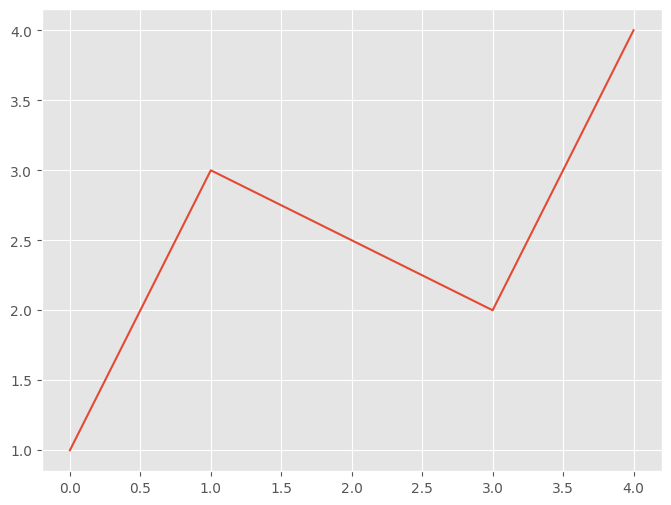

In [97]:
x_values = np.array([0, 1, 3, 4])
y_values = np.array([1, 3, 2, 4])

plt.plot(x_values, y_values)

Note the output above the graph.  Since the last line returns a graph object, its string representation is printed.  Since it is not relevant, we usually omit it.  There are couple of standard ways.  

One is to add a semicolon `;` after the line:

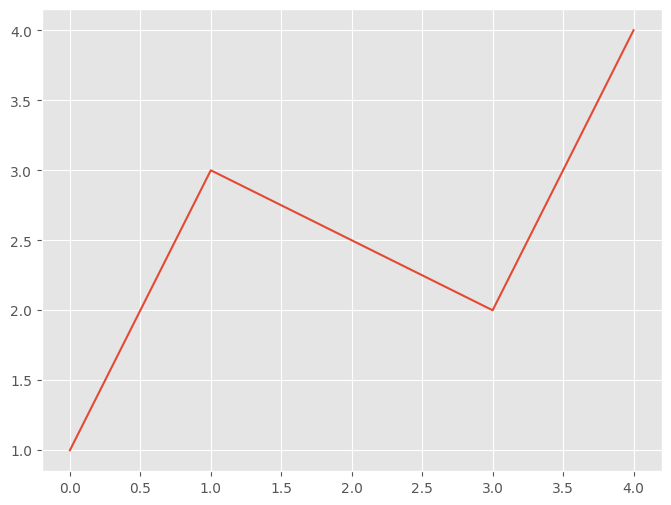

In [98]:
x_values = np.array([0, 1, 3, 4])
y_values = np.array([1, 3, 2, 4])

plt.plot(x_values, y_values);

Another is to add a call of `plt.show()`

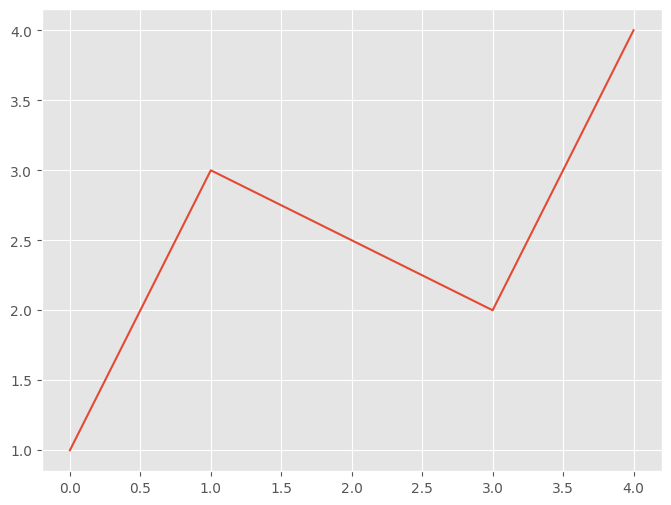

In [99]:
x_values = np.array([0, 1, 3, 4])
y_values = np.array([1, 3, 2, 4])

plt.plot(x_values, y_values)

plt.show()

We will use the first method here.

There is another method, which although longer, gives us more control.  In it we first create the *figures* and *axes* and then add our graphs to them.  Here is our example using this method:

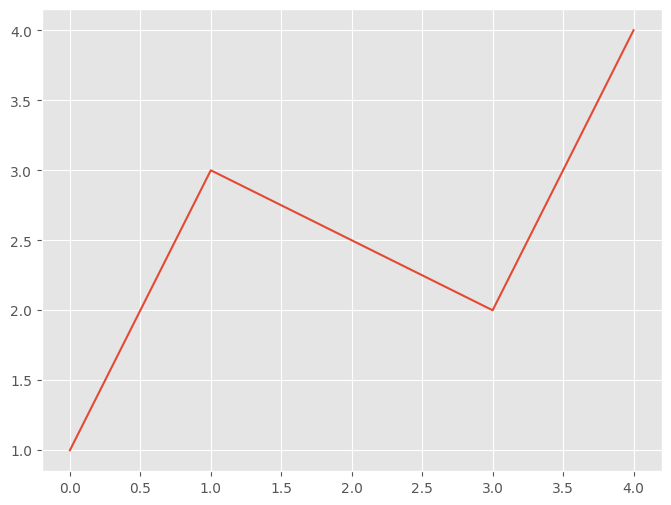

In [100]:
x_values = np.array([0, 1, 3, 4])
y_values = np.array([1, 3, 2, 4])

fig, ax = plt.subplots()
ax.plot(x_values, y_values);

The first method is sometimes called the *implicit method* or *pyplot-style*, while the second is called the *explicit method* or *object-oriented style*, or *OO-style*.

We will use the implicit method whenever we can, but in some cases, especially when overlaying graphs, we might need to use the explicit one.

We can use it to graph math functions, wit the help of NumPy.  For example, we can use $50$ points to plot the graph of $y=\sin(x)$ for $x$ between $0$ and $2\pi$, so that the graph looks smooth:

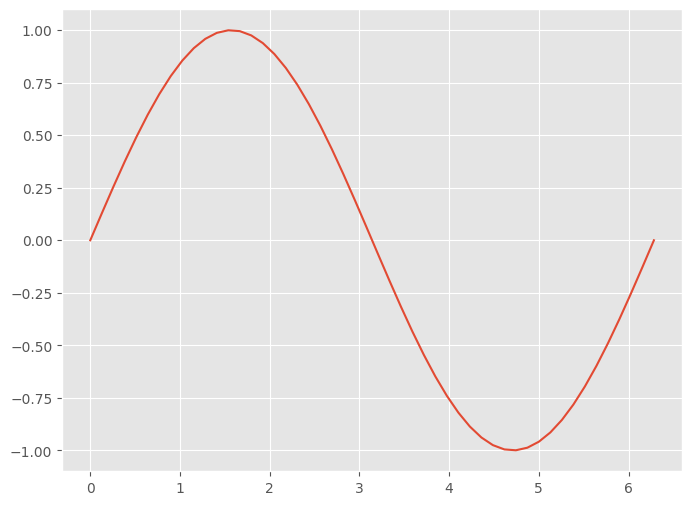

In [101]:
x_values = np.linspace(0, 2* np.pi, 50)
plt.plot(x_values, np.sin(x_values));

Since we used many points, the graph looks curved and smooth, but it is still made of straight lines, which we can see if we use fewer points:

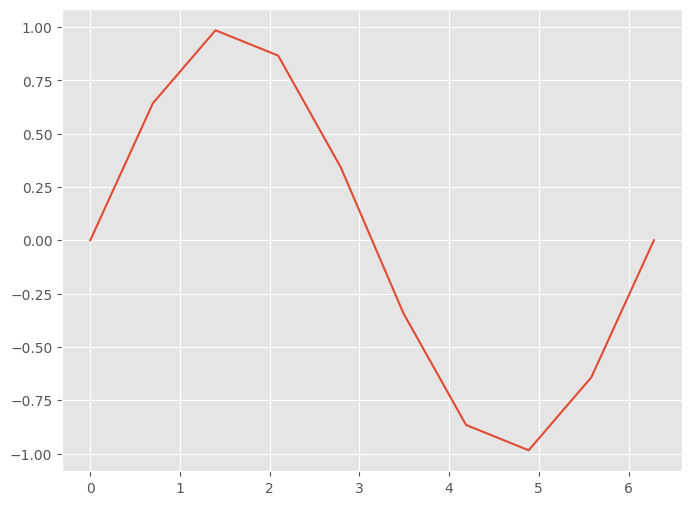

In [102]:
x_values = np.linspace(0, 2* np.pi, 10)
plt.plot(x_values, np.sin(x_values));

If we have data in a data frame in pandas, we can also easily make line plots.  For instance, let's load the file [movies_by_year.csv](movies_by_year.csv) (provided with this notebook): it contains data on movies produced by U.S. studios in each of the years 1980 through 2015. The columns are:

| **Column** | **Content** |
|------------|---------|
| `Year`     | Year |
| `Total Gross` | Total domestic box office gross, in millions of dollars, of all movies released |
| `Number of Movies` | Number of movies released |
| `#1 Movie` | Highest grossing movie |

In [103]:
movies_by_year = pd.read_csv("movies_by_year.csv")
movies_by_year.head(15)

,Year,Total Gross,Number of Movies,#1 Movie
0,2015,11128.5,702,Star Wars: The Force Awakens
1,2014,10360.8,702,American Sniper
2,2013,10923.6,688,Catching Fire
3,2012,10837.4,667,The Avengers
4,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
5,2010,10565.6,536,Toy Story 3
6,2009,10595.5,521,Avatar
7,2008,9630.7,608,The Dark Knight
8,2007,9663.8,631,Spider-Man 3
9,2006,9209.5,608,Dead Man's Chest


Line plots are commonly used to study chronological data.  For instance, let's see how the number of movies changes by year.  Thus, the $x$-values will be the years, and $y$-values will be the number of movies released that year.  

We could use matplotlib directly:

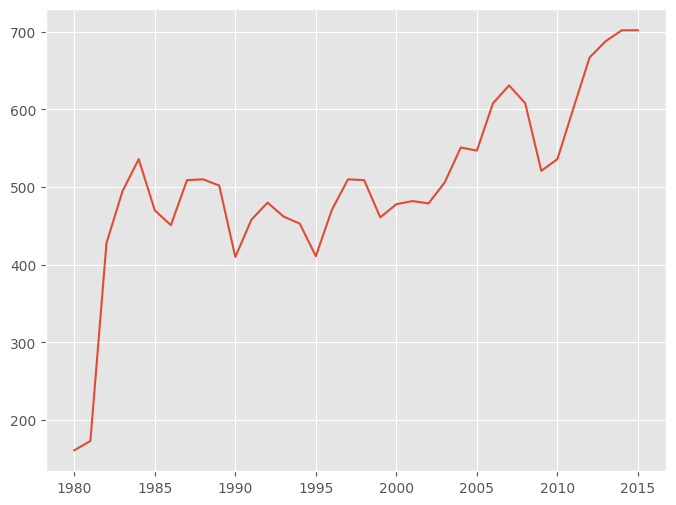

In [104]:
plt.plot(movies_by_year["Year"], movies_by_year["Number of Movies"]);

But we can do it directly from the pandas data frame with the `plot` method: we simply pass the labels for the column with the values for the $x$-axis, followed by the label for the column with the values for the $y$-axis:

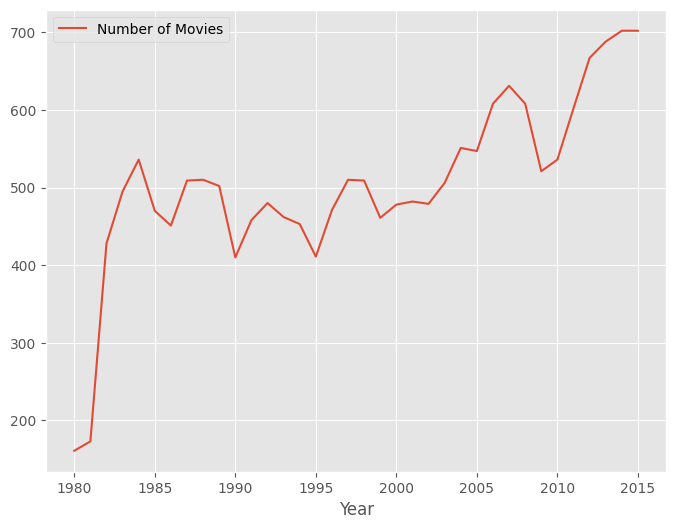

In [105]:
movies_by_year.plot("Year", "Number of Movies");

(Note that we still need the `;` at the end!)

As a benefit, we can see the the $x$-axis is labeled and that we can see also what values is being plotted (in the $y$-axis) in the generated legend!

We can also plot the total gross:

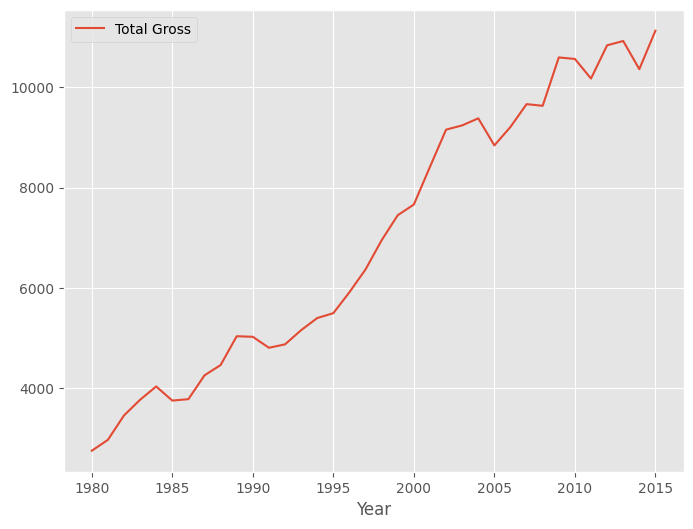

In [106]:
movies_by_year.plot("Year", "Total Gross");

#### Observations

These graphs allow us to quickly see some trends.  Below are some of them, with some possible explanations.

* Great increase in number of movies in the early 1980's (due in part to studios returning to the forefront of movie production after some years of filmmaker driven movies in the 1970's).
* Significant decrease in number of movies between 2007 and 2009, with sharp recovery after (due to [financial crisis](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis)).
* The total gross increased steadily.
* The total gross sharply *increased* between 2008 and 2009, despite the financial crisis (perhaps since people tend to go to the movies when there is a recession;  see ["In Downturn, Americans Flock to the Movies"](http://www.nytimes.com/2009/03/01/movies/01films.html?_r=0)).

### Overlaying Line Plots

We can overlay line plots.  For instance, let's graph both $y=\sin(x)$ and $y=\cos(x)$ together:

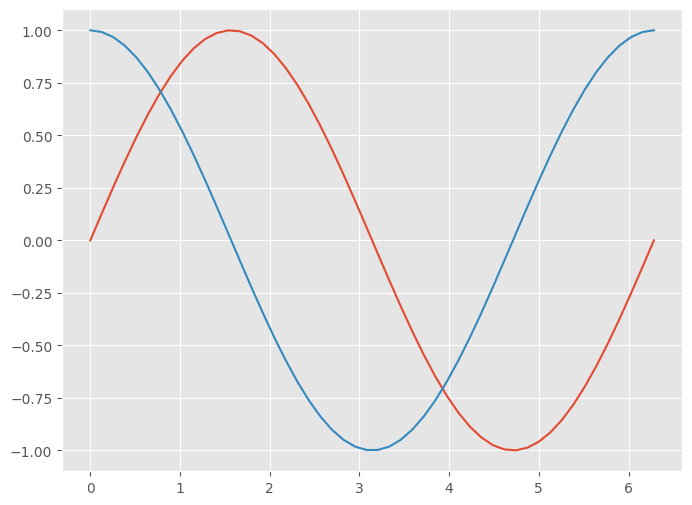

In [107]:
x_values = np.linspace(0, 2 * np.pi, 50)
plt.plot(x_values, np.sin(x_values))
plt.plot(x_values, np.cos(x_values));

Or, using the OO-style:

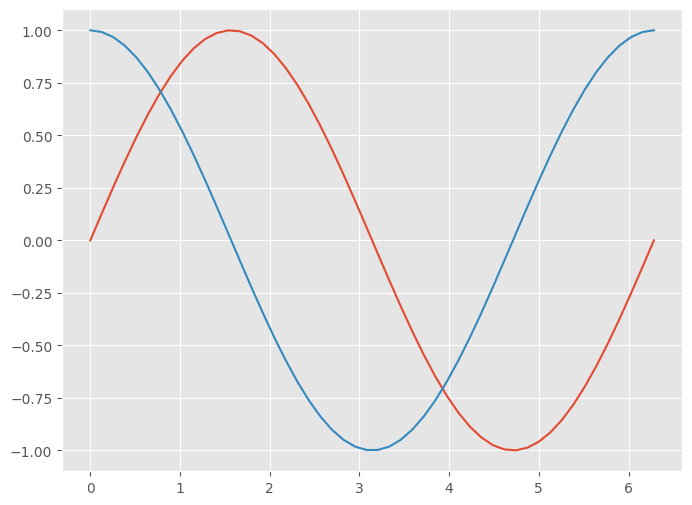

In [108]:
fig, ax = plt.subplots()
ax.plot(x_values, np.sin(x_values))
ax.plot(x_values, np.cos(x_values));

(Note that even though we issues two `plot` commands, only a single plot is generated in both cases.  Use different code cells to generate two plots.)

But note that in either case, if we don't know the math behind, we cannot tell which is which.  So, let's tweak this.

First, we need to add labels to each graph with the optional argument `label=`.  Then, we need to tell matplotlib to add the legend, by adding `plt.legend()` at the end.

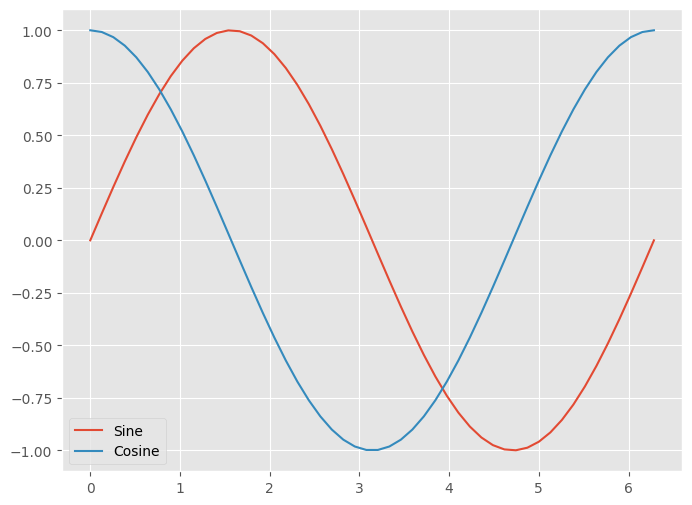

In [109]:
x_values = np.linspace(0, 2 * np.pi, 50)
plt.plot(x_values, np.sin(x_values), label="Sine")
plt.plot(x_values, np.cos(x_values), label="Cosine")

plt.legend();

We can also overlay plots with pandas.  Let's use read some census data with population estimates for the number of children in the US in 2014 and 2019.  (We will manipulate the data frame to only focus on the necessary data.)

In [110]:
data = "http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv"

children = (
    pd.read_csv(data, usecols=["SEX", "AGE", "POPESTIMATE2014", "POPESTIMATE2019"])  # read and select columns
    .rename(columns={"POPESTIMATE2014": "2014", "POPESTIMATE2019": "2019"})  # rename columns
    .query("SEX == 0 and AGE < 19")  # filter for children of both sexes
    .drop(columns="SEX")  # drop SEX column
)

children

,AGE,2014,2019
0,0,3954787,3783052
1,1,3948891,3829599
2,2,3958711,3922044
3,3,4005928,3998665
4,4,4004032,4043323
5,5,4004576,4028281
6,6,4133372,4017227
7,7,4152666,4022319
8,8,4118349,4066194
9,9,4106068,4061874


We can now draw two overlaid line plots, showing the numbers of children in the different age groups for each of the years 2014 and 2019.  For the second entry (that gives the $y$-coordinates), we can pass a list of column labels:

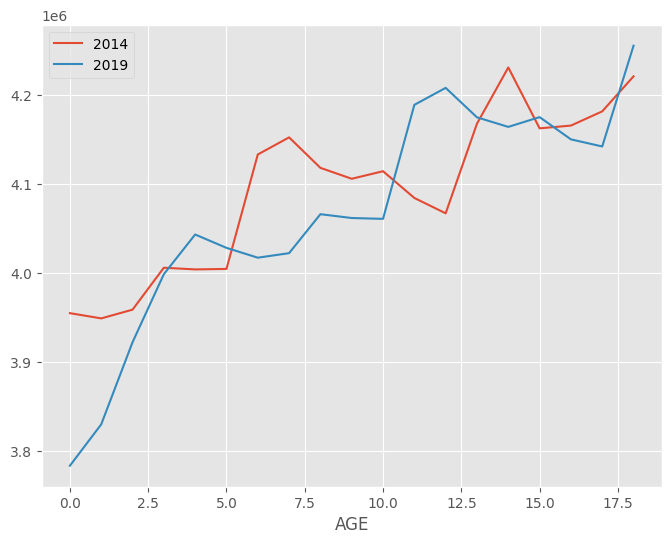

In [111]:
children.plot("AGE", ["2014", "2019"]);

Note that in this case we could simply give the label for the column of $x$-values, and pandas will use every other numerical column for the $y$-values.

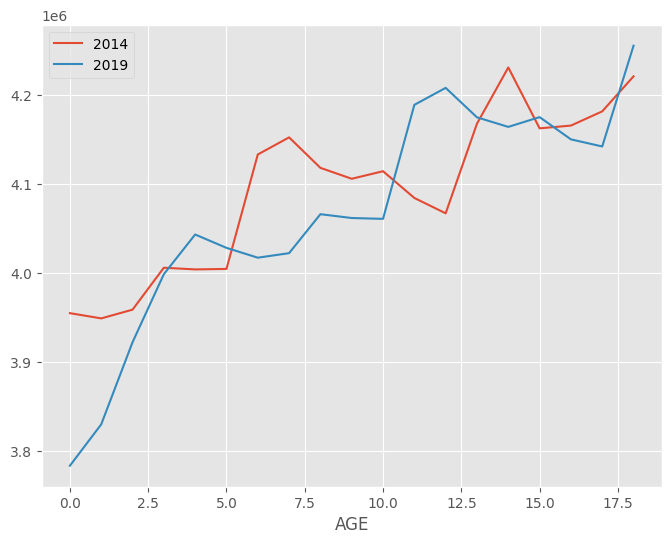

In [112]:
children.plot("AGE");

Note that we can still tweak these plots using matplotlib.  For instance, let's add a label "Population" for the $y$-axis and a title:

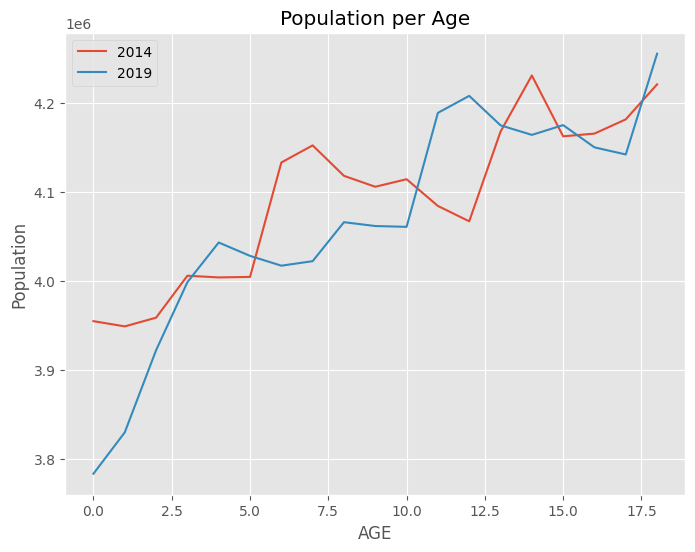

In [113]:
children.plot("AGE")

plt.ylabel("Population")
plt.title("Population per Age");

#### Observations

**Crossings:** There were more 6-year-olds in 2014 than in 2019, and there were more 12-year-olds in 2019 than in 2014.

**Shift:** Of course, the 12-year-olds in 2019 mostly consist of the children who were 7-year-olds in 2014. The blue plot is similar to red plot shifted forward by 5, plus a vertical shift, due to the net effect of children who entered the country between 2014 and 2019 outnumbering those who left. Fortunately at these ages there is not much loss of life.

## Scatter Plots

A *scatter plot* displays the relation between two numerical variables.  It's quite useful to visualize [correlations](https://en.wikipedia.org/wiki/Correlation) between two variables.

A scatter plot is basically a series of points.  In matplotlib, we simply need to give arrays of $x$ and $y$-values to the function `plt.scatter`.  Let's use points $(1, 2)$, $(3, 0)$, $(2, 1)$, $(1, -1)$, $(3, 1)$, and $(5, 0)$:

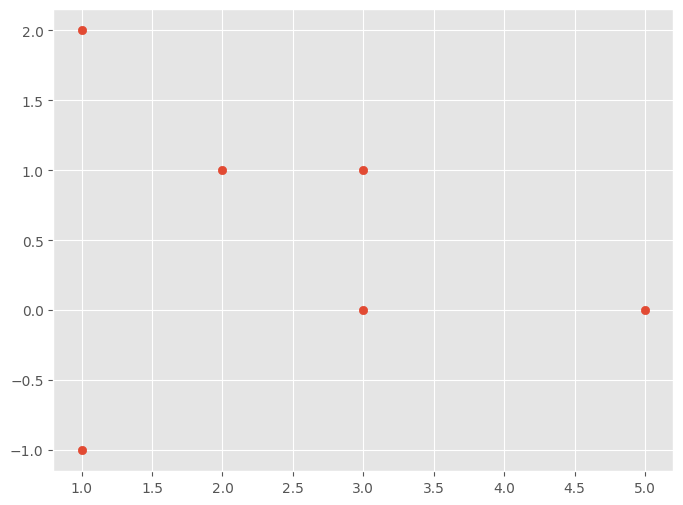

In [114]:
x_values = np.array([1, 3, 2, 1, 3, 5])
y_values = np.array([2, 0, 1, -1, 1, 0])

plt.scatter(x_values, y_values);

Again, we can use pandas to create scatter plots for data in a data frame.

Let's use another data set to illustrate it.  The file [actors.csv](actors.csv) (provided with this notebook) provides data n Hollywood actors. The columns are:

| Column        | Contents |
|---------------------|----------|
|`Actor`              | Name of actor |
|`Total Gross`        | Total gross domestic box office receipt, in millions of dollars, of all of the actor's movies |
| `Number of Movies`  | The number of movies the actor has been in |
| `Average per Movie` | Total gross divided by number of movies |
| `#1 Movie`          | The highest grossing movie the actor has been in |
| `Gross`             | Gross domestic box office receipt, in millions of dollars, of the actor's `#1 Movie` |

In [115]:
actors = pd.read_csv("actors.csv")
actors.head(20)

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


Let's create a scatter plot to visualize if number of movies and total gross are correlated.  We again use the `plot` method for the data frame, passing the column labels for the $x$-values and $y$-values in order, but now we also need the optional argument `kind="scatter"`:

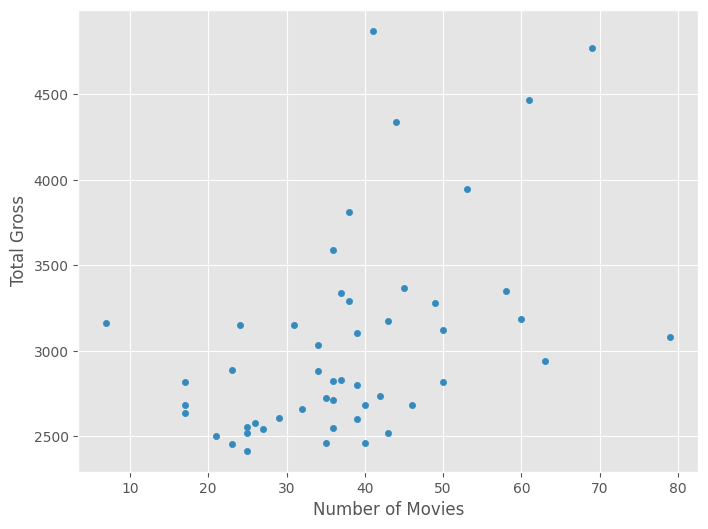

In [116]:
actors.plot("Number of Movies", "Total Gross", kind="scatter");

Note:

- We have a point for each actor (50 in total).
- You can see that it slopes upwards, in general: the more movies, the larger the total gross (in general).
- The plot shows an *correlation* between the variables, and that the correlation is *positive*: high values of one variable tend to be associated with high values of the other, and low values of one with low values of the other, in general. 

Of course there is some variability. Some actors have high numbers of movies but middling total gross receipts. Others have middling numbers of movies but high receipts. That the correlation is positive is simply a statement about the broad general trend.

We've seen the relation between number of movies and *total* gross.  How about *average* gross?

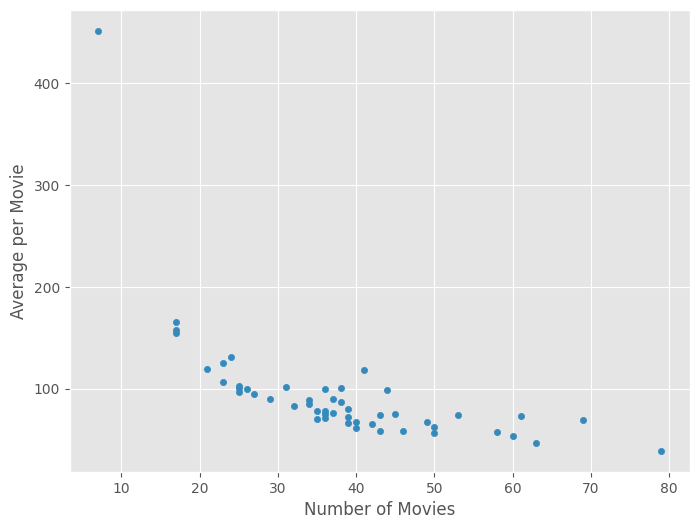

In [117]:
actors.plot("Number of Movies", "Average per Movie", kind="scatter")
plt.show()

Now a *negative* association: the more movies, the *less* the average receipt per movie.

A possible explanations is that actors who make many movies might have a more varied range, from blockbusters to independent or artistic movies.

### Outliers

Note one of the points is quite high and off to the left of the plot. It corresponds to one actor who has a low number of movies and high average per movie. This point is an *outlier*.

The dot does not show the corresponding actor, but we can easily find it:

In [118]:
actors.query("`Average per Movie` > 400")

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
14,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Anthony Daniels is the actor who played C3PO in the Star Wars franchise.

We can also find the actor with many movies and low average:

In [119]:
actors.query("`Number of Movies` > 70")

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
19,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3


### Adding Size

We can also add sizes to the plotted points of a scatter graph to convey some extra information.  The optional argument is `s=` (for size):

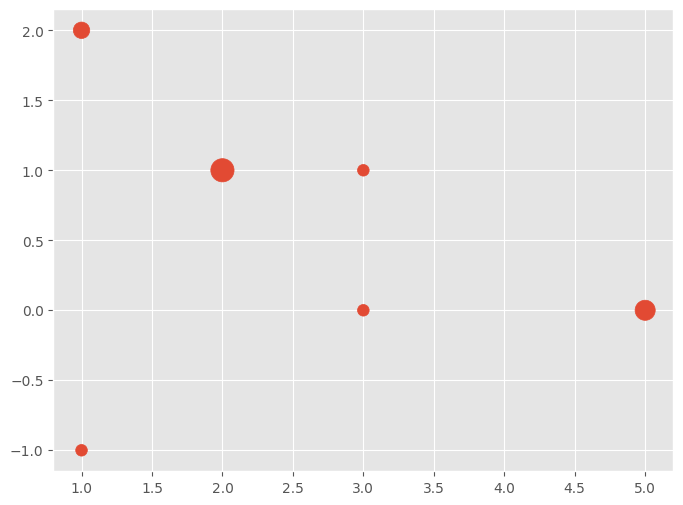

In [120]:
x_values = np.array([1, 3, 2, 1, 3, 5])
y_values = np.array([2, 0, 1, -1, 1, 0])

sizes = 70 * np.array([2, 1, 4, 1, 1, 3])  # tweak the multiplier for better sizes

plt.scatter(x_values, y_values, s=sizes);

With pandas, we can pass a column label to `s=`.  For instance:

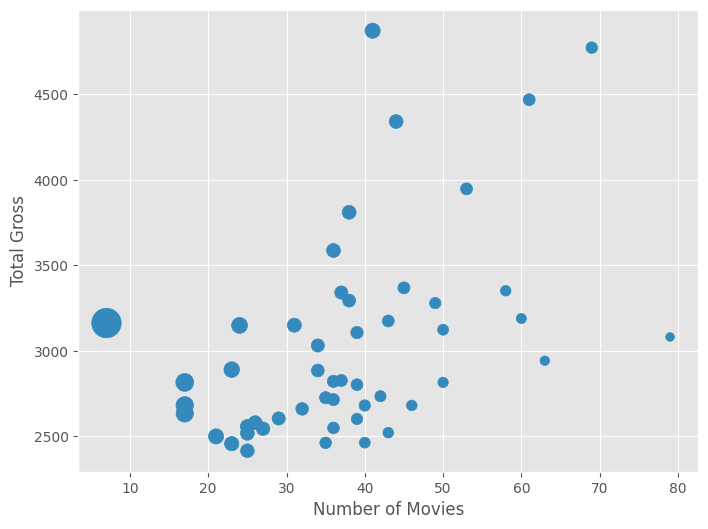

In [121]:
actors.plot("Number of Movies", "Total Gross", s="Average per Movie", kind="scatter");

In this plot we can visualize the relative average per movie between points by the size of the corresponding dots.

### Adding Color

The optional argument `c=` allows us to pass a list/array of colors for the corresponding points in a scatter plot.

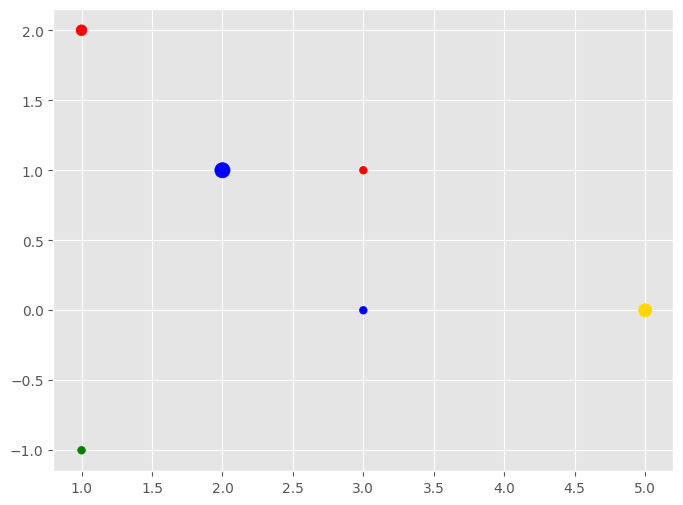

In [122]:
x_values = np.array([1, 3, 2, 1, 3, 5])
y_values = np.array([2, 0, 1, -1, 1, 0])

sizes = 30 * np.array([2, 1, 4, 1, 1, 3])  # tweak the multiplier for better sizes
colors = np.array(["red", "blue", "blue", "green", "red", "gold"])

plt.scatter(x_values, y_values, s=sizes, c=colors);

So, we can convey some extra information with colors, more specifically, we can use colors to distinguish categories.

Let's add a column to our actors data frame with the gender of the actors.  First, let's view the list of actors:

In [123]:
actors["Actor"]

0              Harrison Ford
1          Samuel L. Jackson
2             Morgan Freeman
3                  Tom Hanks
4         Robert Downey, Jr.
5               Eddie Murphy
6                 Tom Cruise
7                Johnny Depp
8              Michael Caine
9         Scarlett Johansson
10               Gary Oldman
11            Robin Williams
12              Bruce Willis
13         Stellan Skarsgard
14           Anthony Daniels
15              Ian McKellen
16                Will Smith
17             Stanley Tucci
18                Matt Damon
19             Robert DeNiro
20              Cameron Diaz
21               Liam Neeson
22               Andy Serkis
23               Don Cheadle
24               Ben Stiller
25      Helena Bonham Carter
26             Orlando Bloom
27           Woody Harrelson
28            Cate Blanchett
29             Julia Roberts
30           Elizabeth Banks
31             Ralph Fiennes
32               Emma Watson
33           Tommy Lee Jones
34            

Now we manually create the array of genders:

In [124]:
genders = np.full(50, "Male", dtype=object)  # initialize as all male
female = [9, 20, 25, 28, 29, 30, 32, 47, 49]  # select the indices of females
genders[female] = "Female"  # change the females

# add gender column
actors_with_gender = actors.assign(Gender=genders)

actors_with_gender

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross,Gender
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7,Male
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4,Male
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9,Male
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0,Male
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4,Male
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2,Male
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3,Male
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3,Male
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9,Male
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4,Female


Now, we need to add a column with colors.  For that, we can use [pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).  First we create the color data frame:

In [125]:
color_df = pd.DataFrame({"Gender": np.array(["Male", "Female"]), "Color": np.array(["green", "gold"])})

color_df

,Gender,Color
0,Male,green
1,Female,gold


Now, since we have a single column with matching label (i.e., Gender), we can merge them.  (The `how="left"` is not really necessary, but it keeps the order of our original data frame.)

In [126]:
actors_with_colors = pd.merge(actors_with_gender, color_df, how="left")

actors_with_colors

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross,Gender,Color
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7,Male,green
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4,Male,green
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9,Male,green
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0,Male,green
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4,Male,green
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2,Male,green
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3,Male,green
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3,Male,green
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9,Male,green
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4,Female,gold


Now, we just need to pass to `c=` the label of the column with colors:

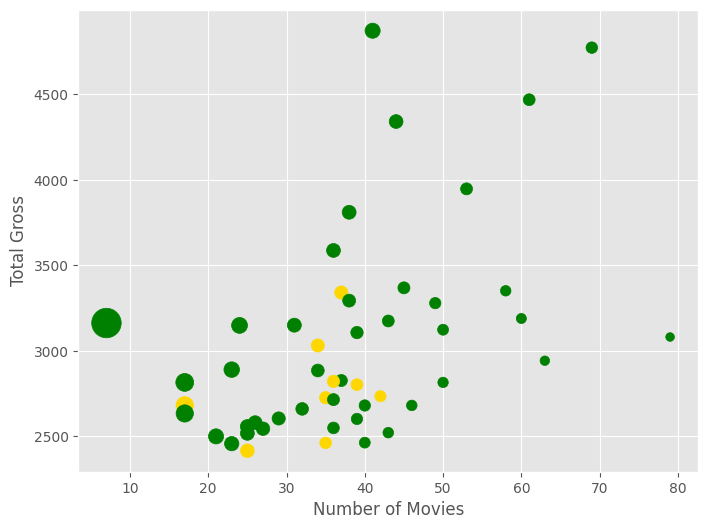

In [127]:
actors_with_colors.plot("Number of Movies", "Total Gross", s="Average per Movie", c="Color", kind="scatter");

### Overlaying Scatter Plots


Although this looks good, we cannot generate a legend for the color easily (at least as far as I know).  For that we need to work a bit harder.  We need to create different scatter plots and overlay them, which allows matplotlib to generate a legend for each.

Before we do this, let's start with the basics.  Let's overlay two scatter plots using plain matplotlib:

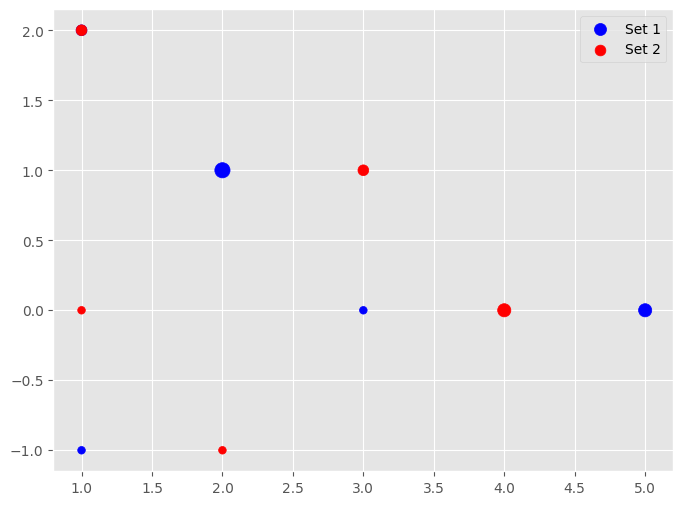

In [128]:
# first set of points
x_values1 = np.array([1, 3, 2, 1, 3, 5])
y_values1 = np.array([2, 0, 1, -1, 1, 0])

sizes1 = 30 * np.array([2, 1, 4, 1, 1, 3])

# second set of points
x_values2 = np.array([4, 2, 1, 1, 3])
y_values2 = np.array([0, -1, 0, 2, 1])

sizes2 = 30 * np.array([3, 1, 1, 2, 2])

plt.scatter(x_values1, y_values1, s=sizes1, label="Set 1", c="blue")  # first scatter plot
plt.scatter(x_values2, y_values2, s=sizes2, label="Set 2", c="red")  # second scatter plot

plt.legend();  # add legend

(Note that we need the `label=` optional argument for the legend.)

Unfortunately, pandas does not work as well.  If we try issuing two separate commands, it produces two distinct graphs:

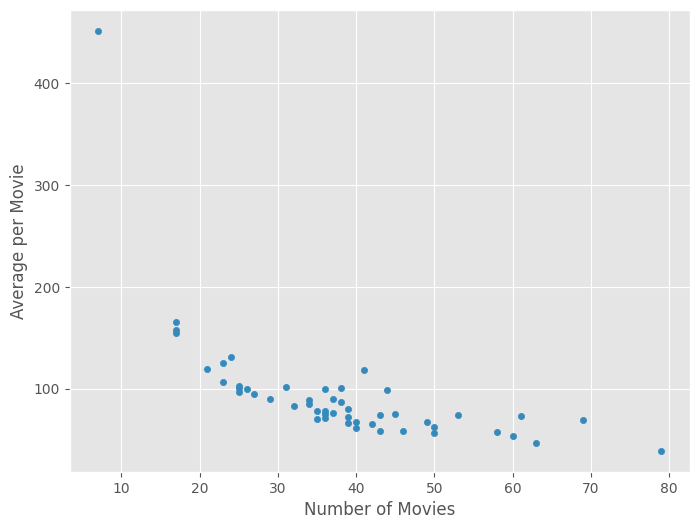

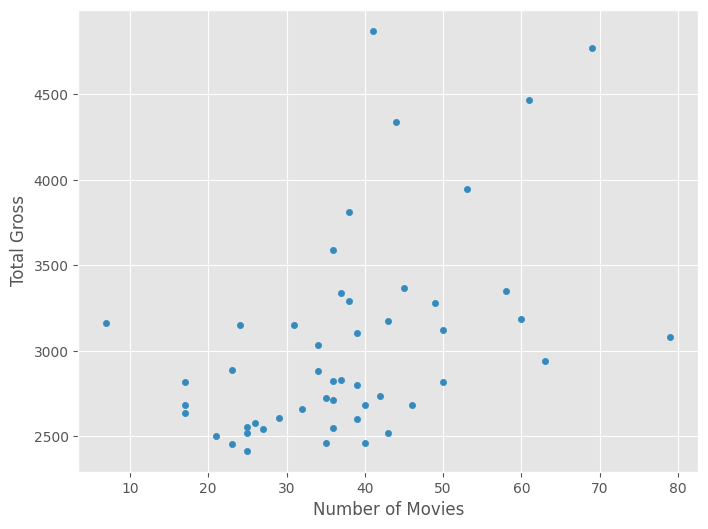

In [129]:
actors.plot("Number of Movies", "Average per Movie", kind="scatter")
actors.plot("Number of Movies", "Total Gross", kind="scatter");

A solution is to use the explicit method.  Let's illustrate with the previous example.

First let's split the data frame into male and female actors:

In [130]:
female_actors = actors_with_colors.query("Gender == 'Female'")
male_actors = actors_with_colors.query("Gender == 'Male'")

Now we can overlay their scatter plots:

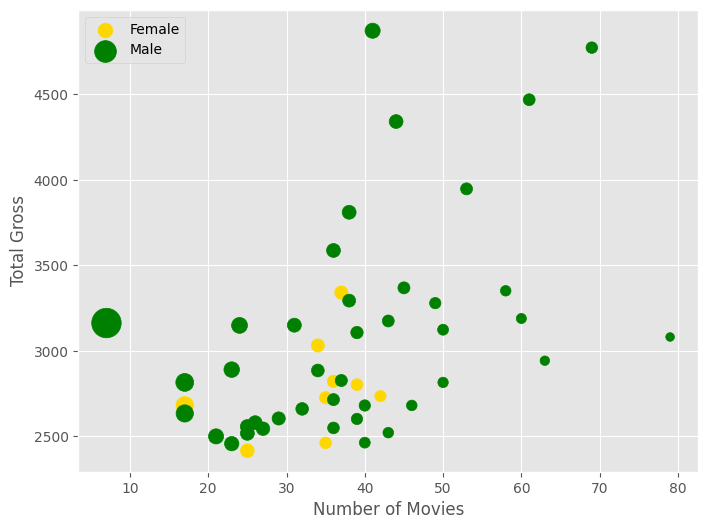

In [131]:
fig, ax = plt.subplots()  # create a SINGLE plot to contain the two plots

# female scatter plot
female_actors.plot(
    "Number of Movies",     # x column
    "Total Gross",          # y column
    c="gold",               # color
    s="Average per Movie",  # size column
    label="Female",         # label
    kind="scatter",         # scatter plot!
    ax=ax,                  # use ax created!
)

# female scatter plot
male_actors.plot(
    "Number of Movies",     # x column
    "Total Gross",          # y column
    c="green",              # color
    s="Average per Movie",  # size column
    label="Male",           # label
    kind="scatter",         # scatter plot!
    ax=ax,                  # use ax created!
);

Note that, besides the `label=` argument, we also need the `ax=ax` in the plot arguments.  (The `ax` on the left is the name to the optional argument, which specify which axes/plot to use.  The `ax` on the left is the one from the first line, where we saved the axes of the figure we created.)

So, we are specifying that both plots need to be done in the same axes/figure (created in the first line).

Note also that the legend is automatically generated.

Since this process is a bit involved, we could wrap it in function.  Let's make it so that we only need to pass a category column.  The function will split the data frame according to the categories, choose a color for each, and plot the corresponding graphs.

In [132]:
def scatter_group_category(df, x, y, category_col, **kwargs):
    """
    Uses a particular category column to split and color scatter graphs of a data frame.
    
    INPUTS:
    df: data frame with data to makes the scatter graphs;
    x: label for the column to be used for the x-axis;
    y: label for the column to be used for the y-axis;
    category_col: label for the column with the categories by which we split the scatter plots;
    **kwargs: keyword arguments (from other matplotlib commands) which are passed to the plotting call;
    
    OUTPUT:
    A single scatter plot with different categories drawn in different colors and labeled according to the
    category.
    """
    # colors: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    cmap = plt.get_cmap("tab10")
    
    fig, ax = plt.subplots()  # create figure

    # loop over categories
    for i, category in enumerate(df[category_col].unique()):
        df_t = df.loc[df[category_col] == category]  # filter for category
        color = cmap(i)  # next color
        df_t.plot(x, y, kind="scatter", color=color, label=category, ax=ax, **kwargs)  # plot

Let's test it:

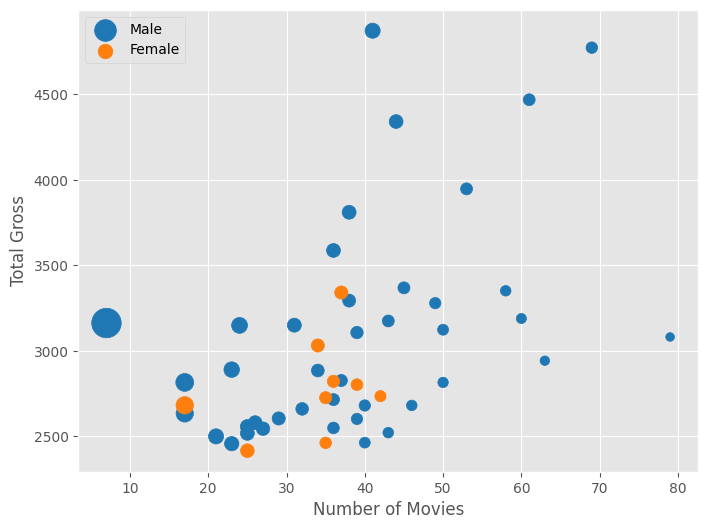

In [133]:
scatter_group_category(actors_with_gender, "Number of Movies", "Total Gross", "Gender", s="Average per Movie")

### Labeling the Points

One can also label each point in a scatter plot.

When there are too many points, these labels can overlap and the plot can become too busy, so it is more suitable when we do not have too many data points.

Thus, to illustrate the use, let's select only the top 10 actors (with respect to total gross) from our `actors` data frame:

In [134]:
top_10_actors = actors.sort_values("Total Gross", ascending=False).head(10)

top_10_actors

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
5,Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
6,Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
7,Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
8,Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
9,Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


(The data frame was already sorted by total gross, so the sorting here was not necessary.)

We use the plot method [annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) to add text to a plot.  We pass it the text and the coordinates where the text should be.

So, we need to loop over our data frame to add the labels:

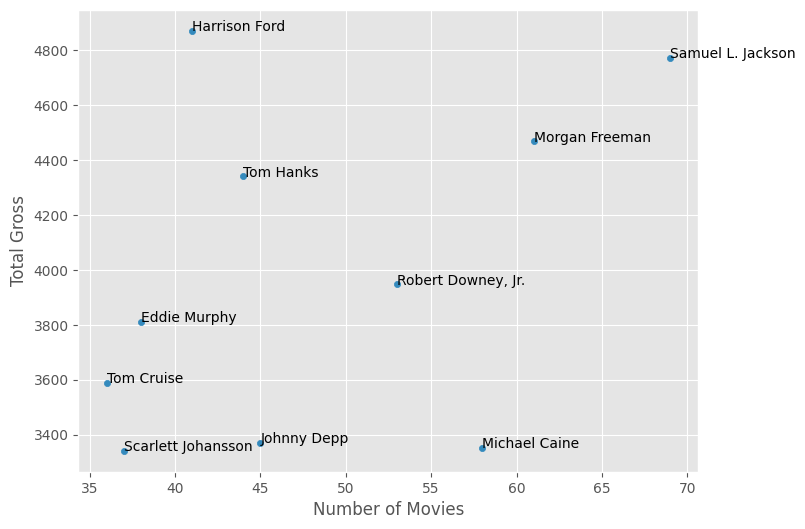

In [135]:
# create scatter plot and *save it*
ax = top_10_actors.plot("Number of Movies", "Total Gross", kind="scatter")

# loop over rows of the data frame
# (the idx has the index of the row, unused here)
for idx, row in top_10_actors.iterrows():
    # add labels
    ax.annotate(row["Actor"],  # text of the label 
                (row["Number of Movies"], row["Total Gross"])  # position of the label
               )

The labels can be further tweaked.  In particular, the options `textcoords="offset points"` and `xytext` allow us to offset the text label.

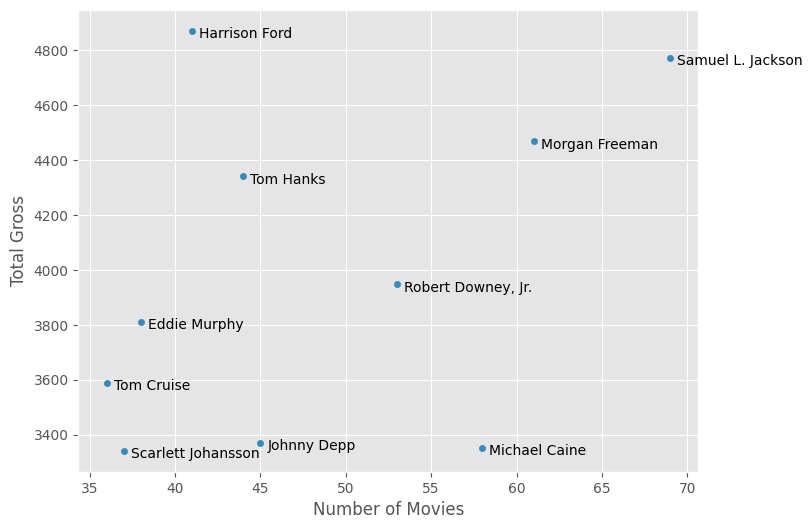

In [136]:
# create scatter plot and *save it*
ax = top_10_actors.plot("Number of Movies", "Total Gross", kind="scatter")

# loop over rows of the data frame
# (the idx has the index of the row, unused here)
for idx, row in top_10_actors.iterrows():
    # add labels
    ax.annotate(row["Actor"],  # text of the label 
                (row["Number of Movies"], row["Total Gross"]),  # position of the label
                textcoords="offset points",  # xytext below will be the offset in points
                xytext=(5, -5),  # offset 5 points right, 5 points down from point
               )

One can also adjust the text font and size:

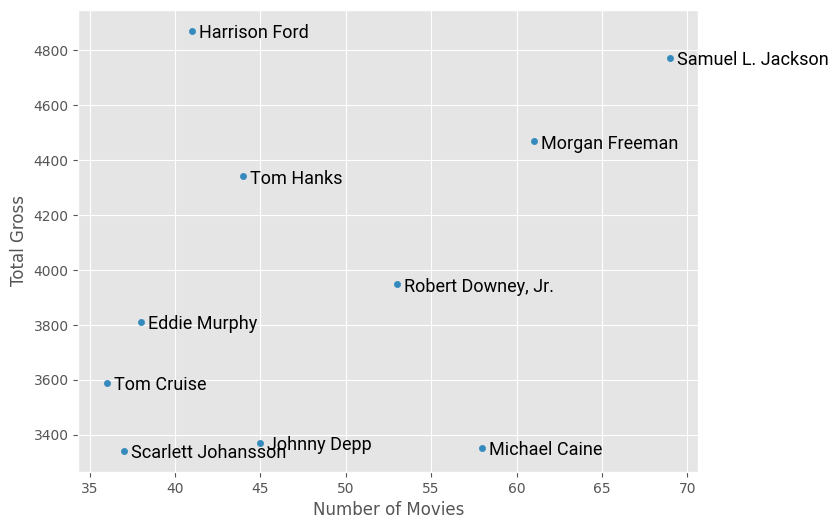

In [137]:
# create scatter plot and *save it*
ax = top_10_actors.plot("Number of Movies", "Total Gross", kind="scatter")

# loop over rows of the data frame
# (the idx has the index of the row, unused here)
for idx, row in top_10_actors.iterrows():
    # add labels
    ax.annotate(row["Actor"],  # text of the label 
                (row["Number of Movies"], row["Total Gross"]),  # position of the label
                textcoords="offset points",  # xytext below will be the offset in points
                xytext=(5, -5),  # offset 5 points left, 5 points down from point
                font="Roboto",  # specify font (font must be available in system)
                fontsize=13,  # font size
               )

Again, to make this task simpler, we can make it into a function:

In [138]:
def scatter_with_labels(df, x, y, label_col, **kwargs):
    """
    Produces a scatter plot with labels.
    
    INPUT:
    df: data frame with data for the plot;
    x: label of column with the values for the x-axis;
    y: label of column with the values for the y-axis;
    label_col: label of the column for the labels for the points;
    kwargs: keyword arguments to be passed to annotate method (NOT plot method).
    
    OUTPUT:
    Scatter plot with points labled according to label_col column.
    """
    # create scatter plot and *save it*
    ax = df.plot(x, y, kind="scatter")

    # loop over rows of the data frame
    # (the idx has the index of the row, unused here)
    for idx, row in df.iterrows():
        # add labels
        ax.annotate(row[label_col],  # text of the label 
                    (row[x], row[y]),  # position of the label
                    **kwargs
                   )    

Let's test it:

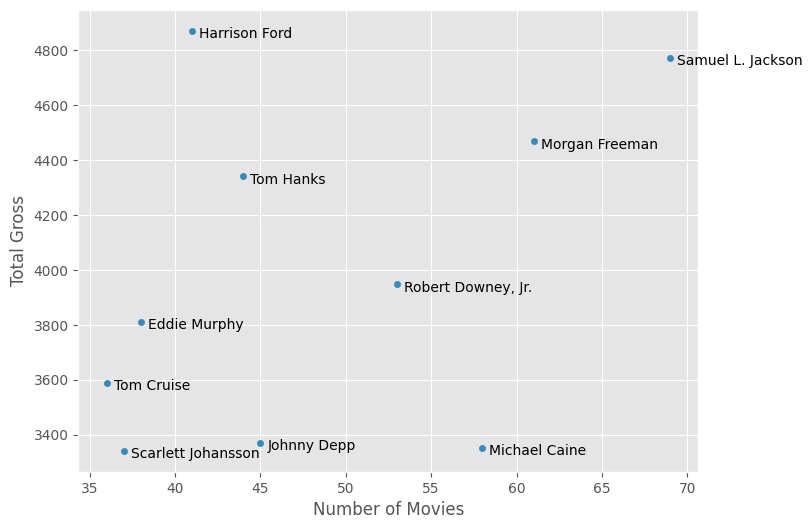

In [139]:
scatter_with_labels(
    top_10_actors,
    "Number of Movies",
    "Total Gross",
    "Actor",
    textcoords="offset points",
    xytext=(5, -5),
)

## Bar Charts

Line and scatter plots (as in our previous examples) are used for *numerical* data.  To visualize numerical data associated to *categorical data* we often use *bar charts*.

We will use the `top_10_actors` data frame above.  We can have a visual representation of this the total gross per actor with a bar chart:

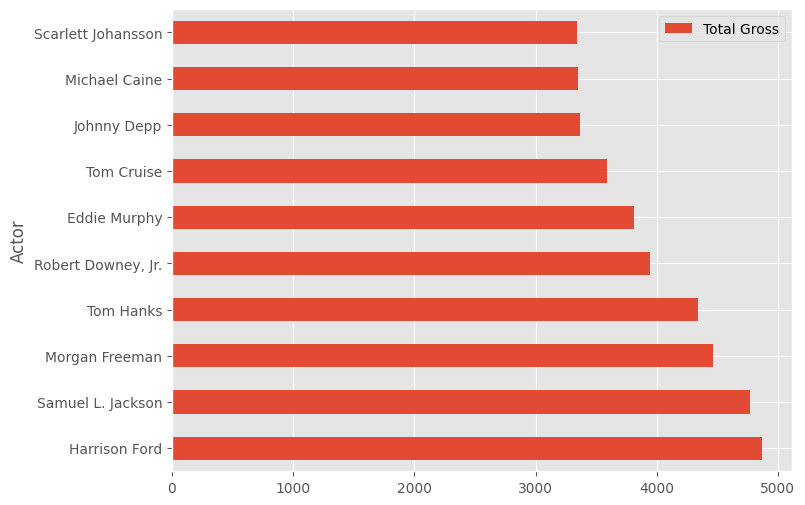

In [140]:
top_10_actors.plot("Actor", "Total Gross", kind="barh");

Note we use the option `kind="barh"` in `plot`, where the `h` stands for *horizontal*.  The option `kind="bar"` would produce *vertical* bars, which is usually does not yield as good results.

Let's visualize now the gross of their number one movies (sorting first):

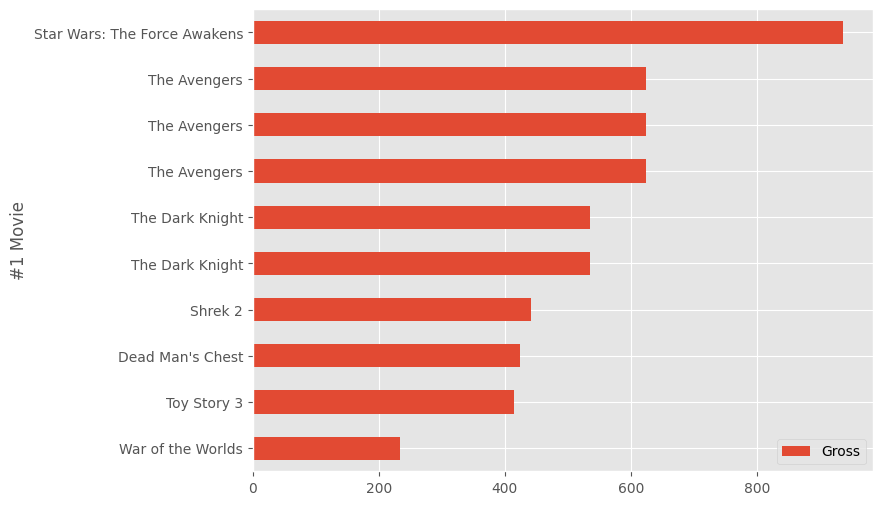

In [141]:
top_10_actors.sort_values("Gross").plot("#1 Movie", "Gross", kind="barh");

Or we could visualize the number of movies:

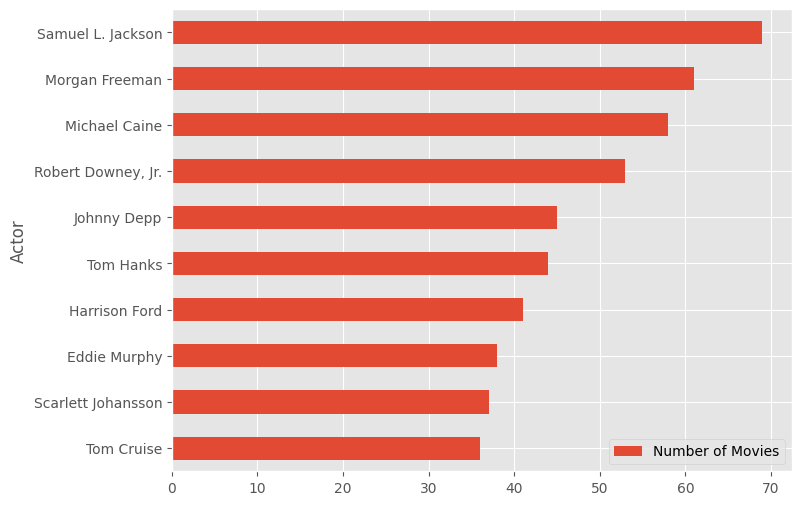

In [142]:
top_10_actors.sort_values("Number of Movies").plot("Actor", "Number of Movies", kind="barh");

Often, though, the data is not ready in the data frame to be directly plotted.  Let's use the [top_movies_2017.csv](top_movies_2017.csv) file (provided with this notebook), which contains data about the top 200 grossing movies in the US until the year 2017, to illustrate this:

In [143]:
top_movies_2017 = pd.read_csv("top_movies_2017.csv")

top_movies_2017

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


Suppose we want to see how many top movies each studio had.  Since we want information about the studio category, we need to to use `groupby`.  And since we need to just count the movies (and hence rows in the data frame), we need to aggregate the data for each studio with `size`.  (Let's also sort it).

In [144]:
top_movies_2017.groupby("Studio").size().sort_values()

Studio
AVCO                     1
Sum.                     1
Selz.                    1
IFC                      1
Metro                    1
NM                       1
Orion                    1
Tristar                  2
Dreamworks               3
Lionsgate                3
RKO                      3
Sony                     4
Paramount/Dreamworks     4
Newline                  5
United Artists           6
MGM                      7
Columbia                 9
Disney                  11
Universal               23
Fox                     24
Paramount               25
Warner Brothers         29
Buena Vista             35
dtype: int64

Now can easily produce a bar chart.  Since there is only one categorical "column", the index (which is not technically a column), and one numerical columns, we can simply do:

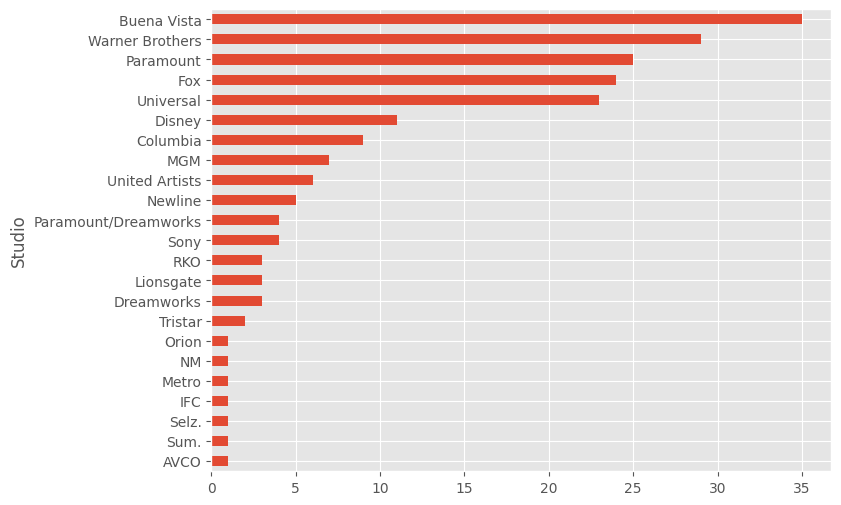

In [145]:
top_movies_2017.groupby("Studio").size().sort_values().plot(kind="barh");

If we want to see how much money a studio made with all its top movies:

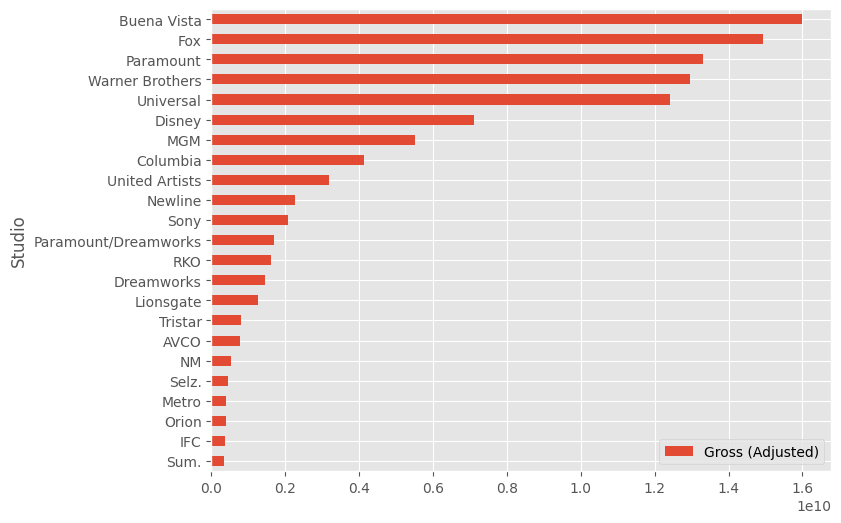

In [146]:
(
    top_movies_2017[["Studio", "Gross (Adjusted)"]]
    .groupby("Studio").sum()
    .sort_values("Gross (Adjusted)")
    .plot(kind="barh")
);

### Overlaying Bar Charts

If we can display different sets of numerical data associated to the categories in the same bar graph.  (It is probably better if they are in the same scale and or units.)

To illustrate this situation, let's load another data frame, from the file [usa_ca_2019.csv](usa_ca_2019.csv) (provided with this notebook):

In [147]:
usa_ca = pd.read_csv("usa_ca_2019.csv")

usa_ca

,Ethnicity/Race,USA All,CA All,USA Children,CA Children
0,API,5.8,15.1,4.9,11.5
1,Black,12.2,5.3,13.4,4.9
2,Hispanic,18.5,39.5,25.6,52.1
3,White,60.1,36.4,50.0,25.5
4,Other,3.4,3.7,6.1,6.0


The body of the data frame contains percents in the different categories. Each column shows the distribution of the `Ethnicity/Race` variable in the group of people corresponding to that column. So in each column, the entries add up to 100. The `API` category consists of Asians and Pacific Islanders including Native Hawaiians. The `Other` category includes Native Americans, Alaskan natives, and people who identify with multiple races.

Since all the numerical data associated to the Ethnicity category are percentages, they fit well together, and we can display them in the same bar graph.

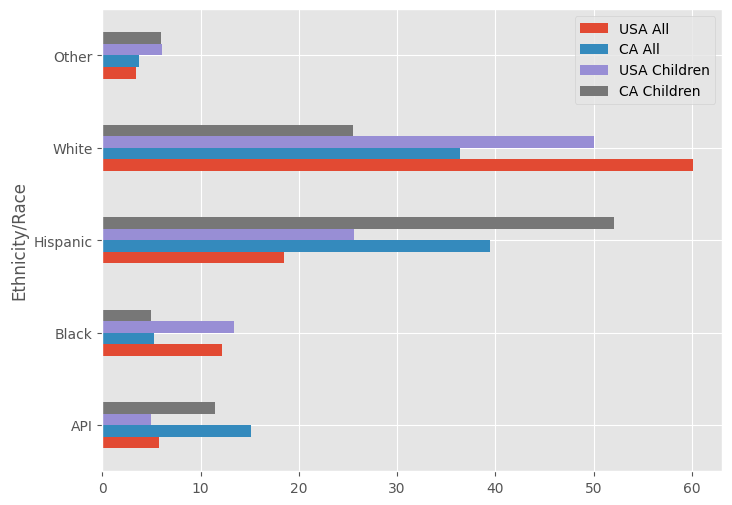

In [148]:
usa_ca.plot("Ethnicity/Race", kind="barh");

Note that it took all the numerical columns by default.  We could have specified them by just passing first the categorical column label, and then the labels for each numerical column we want in our bar chart.

We can illustrate it here.  There is a bit too much information on this graph, and it would also make sense to compare Children and All separately, if the focus is the difference between All US and California. 

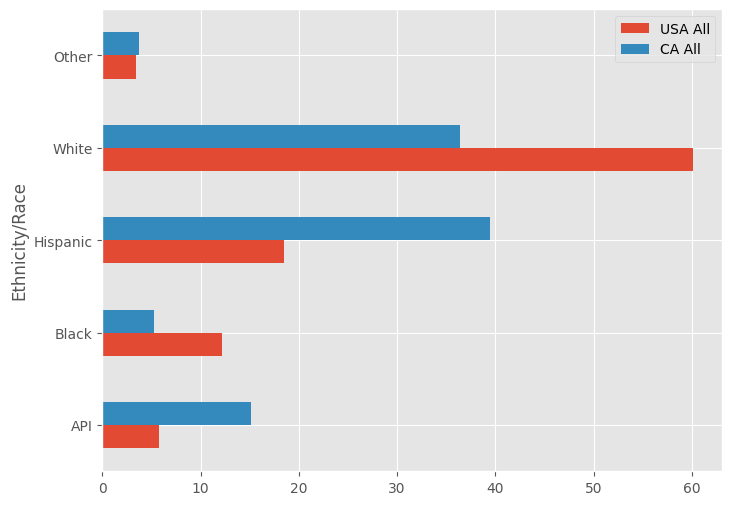

In [149]:
usa_ca[["Ethnicity/Race", "USA All", "CA All"]].plot("Ethnicity/Race", kind="barh");

Or, if the focus is the difference between Children and All, in California:

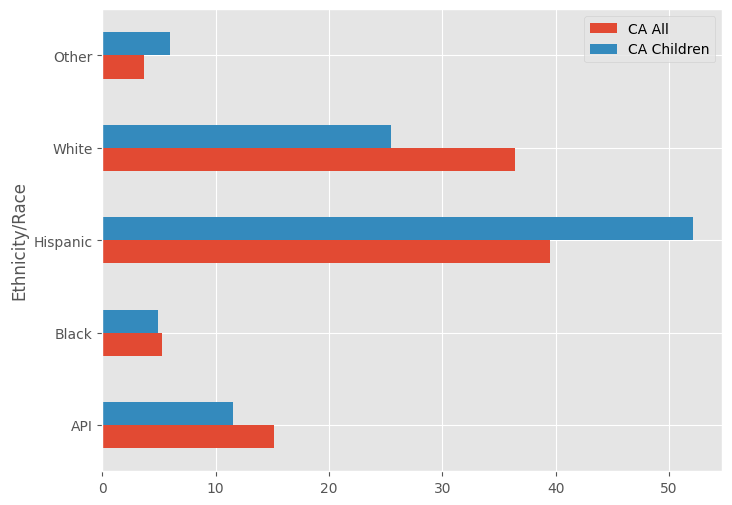

In [150]:
usa_ca[["Ethnicity/Race", "CA All", "CA Children"]].plot("Ethnicity/Race", kind="barh");

## Histograms

###  Histograms with Matplotlib

Suppose now that we want to analyze how some *numerical data* is distributed.

Let's start by producing a random normally distributed array with 200 entries:

In [151]:
data = np.random.normal(0, 1, 200)

We can find its range by finding the maximum and minimum of the array:

In [152]:
data_min = np.min(data)
data_max = np.max(data)

data_min, data_max

(-2.6514655352343905, 2.626062550652119)

But how is the data distributed in between those two values?  For instance, we could divide the range from the maximum to the minimum into 10 intervals of the same size, which we call *bins*, and then count how many values we have in each interval/bin.  Visualizing the result is easy, using matplotlib `hist` (for histogram) function:

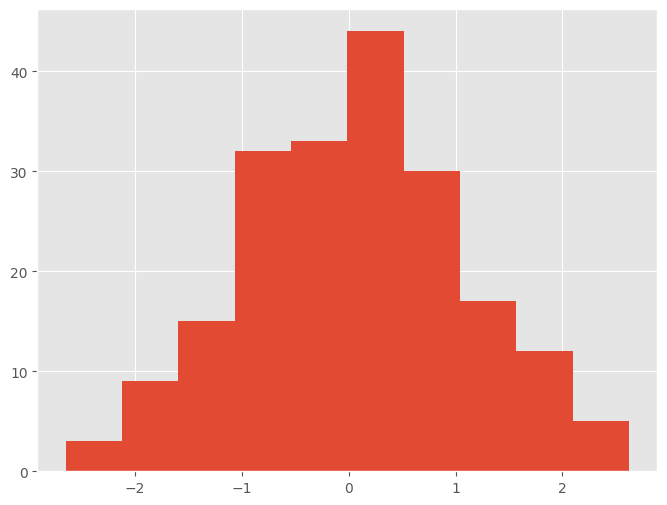

In [153]:
counts, boundaries, container = plt.hist(data, bins=10)

Matplotlib not only returns the histogram (more about it later), but also three values, which we saved as `counts`, `boundaries`, and `container`.

`boundaries` contains the boundaries for the bins:

In [154]:
boundaries

array([-2.65146554, -2.12371273, -1.59595992, -1.06820711, -0.5404543 ,
       -0.01270149,  0.51505132,  1.04280412,  1.57055693,  2.09830974,
        2.62606255])

`counts` (the first output) contains the counts for each bin:

In [155]:
counts

array([ 3.,  9., 15., 32., 33., 44., 30., 17., 12.,  5.])

Let's print the counts (that are represented by the histogram):

In [156]:
# left boundary for the first bin
left = boundaries[0]

for count, right in zip(counts, boundaries[1:]):
    print(f"There are {int(count):>2} between {left:>5.2f} and {right:>5.2f}.")
    left = right # adjust right boundary

There are  3 between -2.65 and -2.12.
There are  9 between -2.12 and -1.60.
There are 15 between -1.60 and -1.07.
There are 32 between -1.07 and -0.54.
There are 33 between -0.54 and -0.01.
There are 44 between -0.01 and  0.52.
There are 30 between  0.52 and  1.04.
There are 17 between  1.04 and  1.57.
There are 12 between  1.57 and  2.10.
There are  5 between  2.10 and  2.63.


(We will quietly ignore the third output, as it is not relevant to us here.)

Depending on the matplotlit style sheet chosen (we chose `ggplot` here), the bars of the histogram "merge" together.  One can avoid it by adding a white border to the bars with the option `ec="white":`

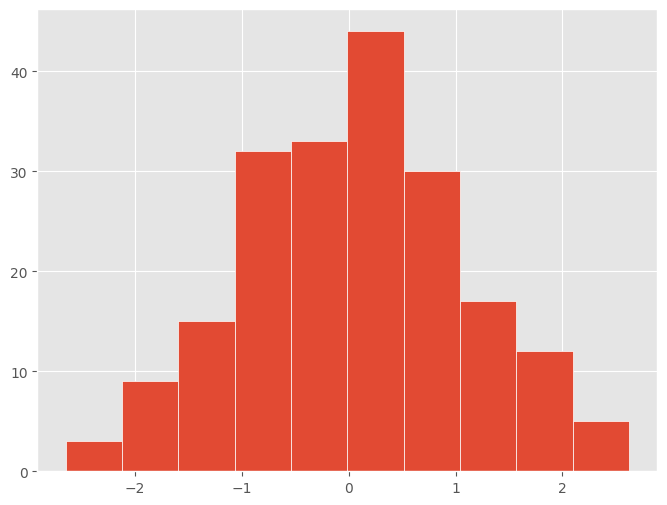

In [157]:
plt.hist(data, ec="white", bins=10);

The number of bins can also be changed:

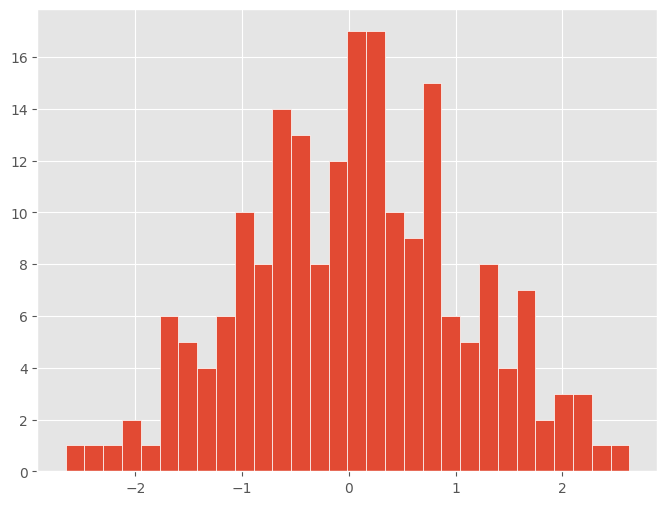

In [158]:
plt.hist(data, ec="white", bins=30);

Moreover, we can specify the boundary of the bins ourselves:

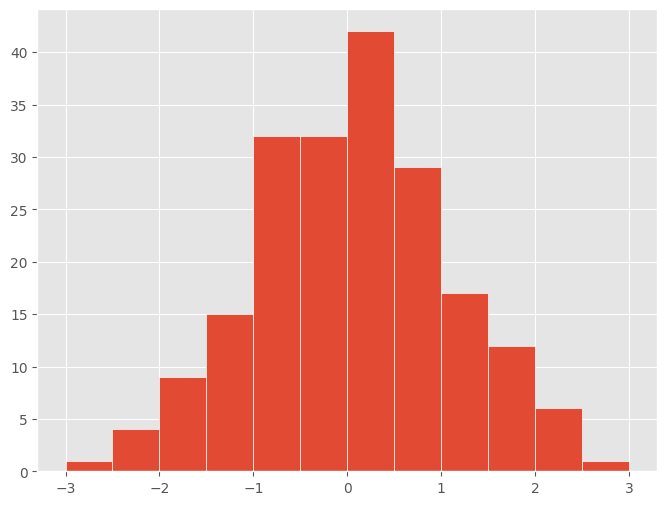

In [159]:
bins = np.arange(-3, 3.5, 0.5)  # [-3, -2.5, -2, ..., 2, 2.5, 3]
plt.hist(data, ec="white", bins=bins);

The bins can have different lengths:

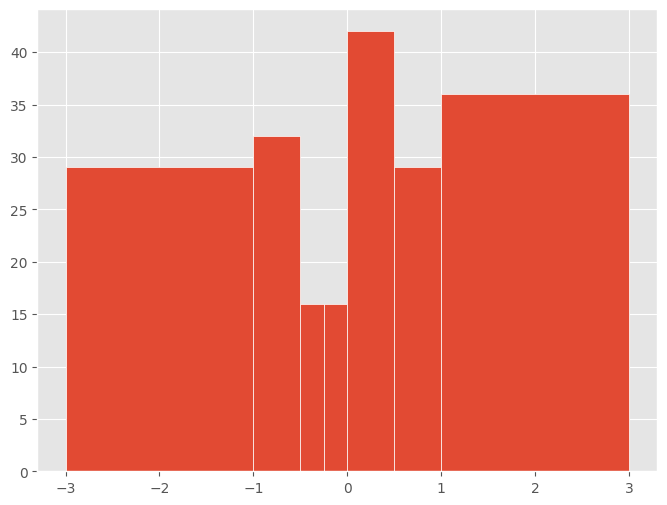

In [160]:
uneven_bins = [-3, -1, -0.5, -0.25, 0, 0.5, 1, 3]
plt.hist(data, ec="white", bins=uneven_bins);

### Density Histograms

It is often desirable to have *density histograms*, in which the *areas* of the bars correspond to the proportion of elements in the corresponding bin.  (E.g., if the area of the bar is $0.25$, then $25\%$ of the data in the array is in that bin.)

So, in this case, we look for *areas*, rather than heights.

Note that since

$$
\begin{align*}
  \text{percent of entries in bin} &= \text{area of bar} \\
  &= \text{height of bar} \times \text{width of bin}
\end{align*}
$$

we have

$$
\text{height of bar} = \frac{\text{percent of entries in bin}}{\text{width of bin}}.
$$

The option for density histograms is `density=True`:

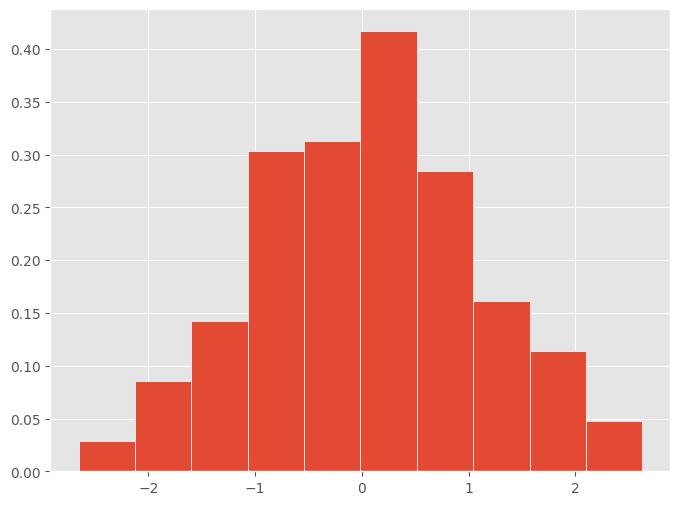

In [161]:
plt.hist(data, ec="white", bins=10, density=True);

If we compare this density histogram with the "plain" one, we see that all that changed is the scale of the $y$-axis:

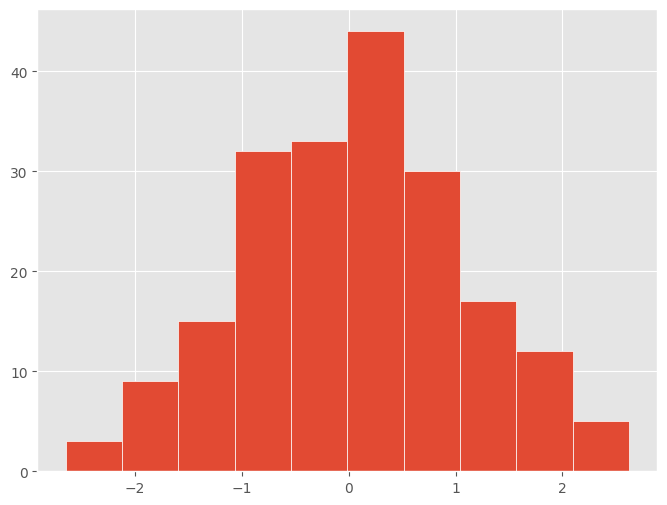

In [162]:
plt.hist(data, ec="white", bins=10);

On the other hand, this is only true when *the bins have the same lengths*.

For instance, compare:

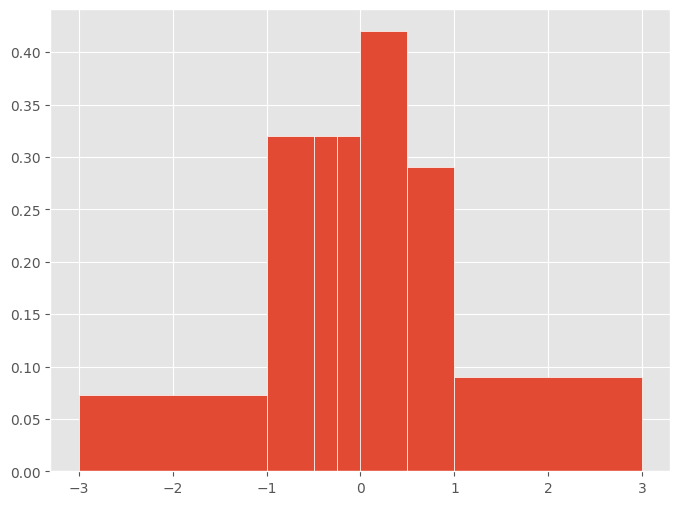

In [163]:
plt.hist(data, ec="white", bins=uneven_bins, density=True);

and

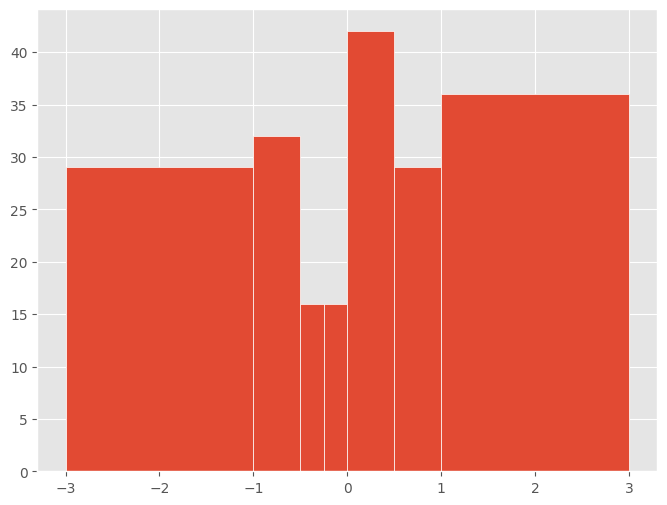

In [164]:
plt.hist(data, ec="white", bins=uneven_bins);

Density histograms of particularly interest when dealing with [empirical probabilities](https://en.wikipedia.org/wiki/Empirical_probability) as the histogram approximates a probability curve.

For instance, if we repeat our previous example (or random elements chosen with probabilities given by a normal curve) with more terms (20,000 instead of 200) an more bins, we can see the the shape of the normal curve (in blue below):

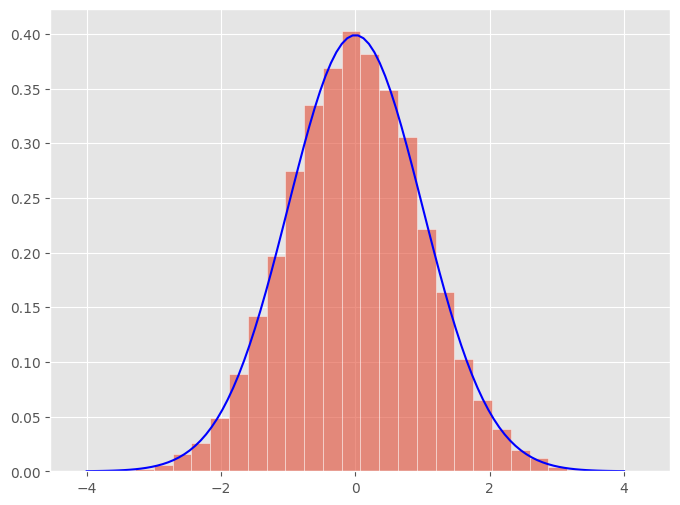

In [165]:
mean = 0
std_dev = 1

data = np.random.normal(mean, std_dev, 20_000)

# histogram
plt.hist(data, ec="white", bins=30, density=True, alpha=0.6)

# normal curve
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)
y = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((x - mean) / std_dev) ** 2)

plt.plot(x, y, c="blue");

(The option `alpha=0.6` makes the histogram somewhat transparent.)

### Histograms with pandas

We can use pandas to draw histograms directly as well.

For instance, remember our `top_movies_2017` data frame:

In [166]:
top_movies_2017

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


Let;s see how the adjust gross is distributed (in 15 bins of equal size) with the pandas method `hist`:

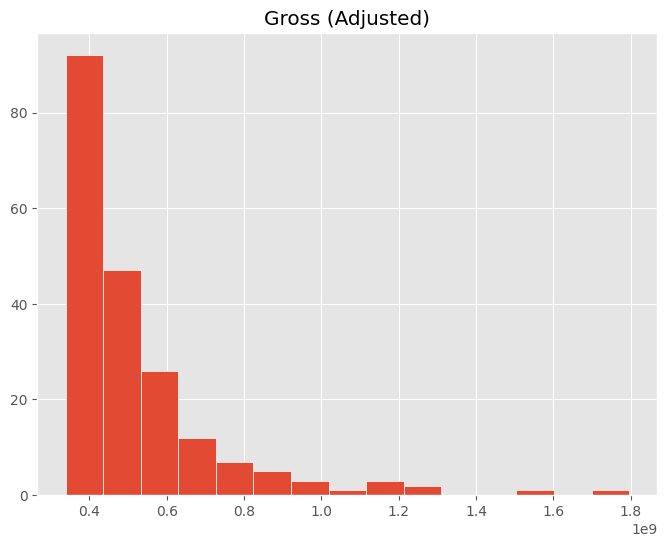

In [167]:
top_movies_2017.hist("Gross (Adjusted)", bins=15, ec="white");

We can also make density histograms with the option `density=True`:

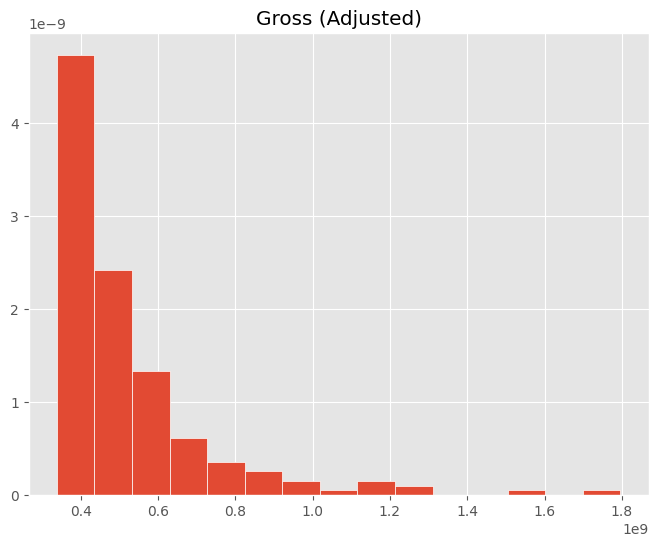

In [168]:
top_movies_2017.hist("Gross (Adjusted)", bins=15, ec="white", density=True);

As a last example, here is the density histogram for the number of movies of the top 50 US actors:

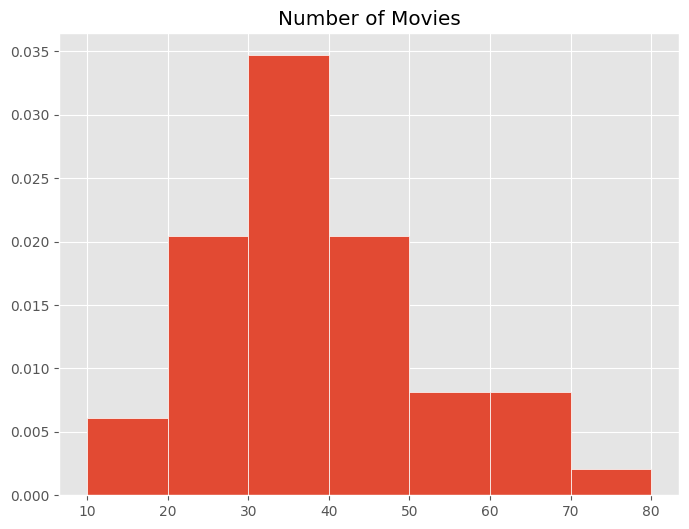

In [169]:
movie_bins = np.arange(10, 81, 10)
actors.hist("Number of Movies", bins=movie_bins, ec="white", density=True);

From the graphs we can see that about $35\%$ of the actors had between 30 and 40 movies.

### Counts with pandas

Unlike `plt.hist`, the `hist` method for pandas does not give us the numerical counts.  But we can still get with `pd.cut`.  For example:

In [170]:
pd.cut(actors["Number of Movies"], bins=movie_bins)

0     (40.0, 50.0]
1     (60.0, 70.0]
2     (60.0, 70.0]
3     (40.0, 50.0]
4     (50.0, 60.0]
5     (30.0, 40.0]
6     (30.0, 40.0]
7     (40.0, 50.0]
8     (50.0, 60.0]
9     (30.0, 40.0]
10    (30.0, 40.0]
11    (40.0, 50.0]
12    (50.0, 60.0]
13    (40.0, 50.0]
14             NaN
15    (30.0, 40.0]
16    (20.0, 30.0]
17    (40.0, 50.0]
18    (30.0, 40.0]
19    (70.0, 80.0]
20    (30.0, 40.0]
21    (60.0, 70.0]
22    (20.0, 30.0]
23    (30.0, 40.0]
24    (30.0, 40.0]
25    (30.0, 40.0]
26    (10.0, 20.0]
27    (40.0, 50.0]
28    (30.0, 40.0]
29    (40.0, 50.0]
30    (30.0, 40.0]
31    (30.0, 40.0]
32    (10.0, 20.0]
33    (40.0, 50.0]
34    (30.0, 40.0]
35    (30.0, 40.0]
36    (10.0, 20.0]
37    (20.0, 30.0]
38    (30.0, 40.0]
39    (20.0, 30.0]
40    (20.0, 30.0]
41    (30.0, 40.0]
42    (20.0, 30.0]
43    (40.0, 50.0]
44    (20.0, 30.0]
45    (20.0, 30.0]
46    (30.0, 40.0]
47    (30.0, 40.0]
48    (20.0, 30.0]
49    (20.0, 30.0]
Name: Number of Movies, dtype: category
Categories

The result is a *series* with the same index, and in each row we have the bin in which the corresponding value in the data frame fall in.

For instance, since at index `10` we have `(30.0, 40]`, it means that the actor in row 10 (Gary Oldman) has between 30 and 40 movies, 30 excluded, but 40 included.  (He actually had 38 movies).

To get the counts, we could use the series method `value_counts`:

In [171]:
pd.cut(actors["Number of Movies"], bins=movie_bins).value_counts().sort_index()

Number of Movies
(10, 20]     3
(20, 30]    10
(30, 40]    19
(40, 50]    10
(50, 60]     3
(60, 70]     3
(70, 80]     1
Name: count, dtype: int64

Let's make this into a data frame, and add percentages:

In [172]:
(
    pd.cut(actors["Number of Movies"], bins=movie_bins) # cut in bins
    .value_counts()  # get the counts
    .to_frame("Count")  # convert to data frame
    .assign(Percentage=lambda count: 100 * count/len(actors))  # add Percentage column
)

,Count,Percentage
Number of Movies,,
"(30, 40]",19,38.0
"(20, 30]",10,20.0
"(40, 50]",10,20.0
"(10, 20]",3,6.0
"(50, 60]",3,6.0
"(60, 70]",3,6.0
"(70, 80]",1,2.0


Note that by default it includes the left boundaries, but not the right ones.  In particular it does not include the first value.  We can include it with the option `include_lowest=True`:

In [173]:
pd.cut(actors["Number of Movies"], bins=movie_bins, include_lowest=True).value_counts()

Number of Movies
(30.0, 40.0]     19
(20.0, 30.0]     10
(40.0, 50.0]     10
(9.999, 20.0]     3
(50.0, 60.0]      3
(60.0, 70.0]      3
(70.0, 80.0]      1
Name: count, dtype: int64

(Note we have `(9.999, 20.0]` instead of `(10.0, 20.0]`.)

Or we can choose to exclude the right boundaries instead of the left (and include the left):

In [174]:
pd.cut(actors["Number of Movies"], bins=movie_bins, right=False).value_counts()

Number of Movies
[30, 40)    17
[20, 30)    10
[40, 50)    10
[50, 60)     4
[60, 70)     4
[10, 20)     3
[70, 80)     1
Name: count, dtype: int64

In [175]:
(
    pd.cut(actors["Number of Movies"], bins=movie_bins, right=False) # cut in bins
    .value_counts()  # get the counts
    .to_frame("Count")  # convert to data frame
    .assign(Percentage=lambda count: 100 * count/len(actors))  # add Percentage column
)

,Count,Percentage
Number of Movies,,
"[30, 40)",17,34.0
"[20, 30)",10,20.0
"[40, 50)",10,20.0
"[50, 60)",4,8.0
"[60, 70)",4,8.0
"[10, 20)",3,6.0
"[70, 80)",1,2.0


Note that the numbers now match the values in our histogram!

### Multiple Histograms

Sometimes we want to compare the distributions of numerical data for different categories.  In those cases its useful to compare their histograms.

As an example, let's look at some data about births, available in the file [baby.csv](baby.csv) (provided with this notebook):

In [176]:
baby = pd.read_csv("baby.csv")

baby

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


The data frame `births` contains the following variables for 1,174 mother-baby pairs:
- birth weight in ounces, 
- the number of gestational days, 
- the mother's age, 
- the mother's height in inches, 
- pregnancy weight in pounds, 
- and whether or not the mother smoked during pregnancy.

Imagine we are interested in knowing if the whether or not a mother smokes has an association with the baby's birth weight.  We can draw the weight distributions for both and compare the obtained histograms.

We can do it "manually":

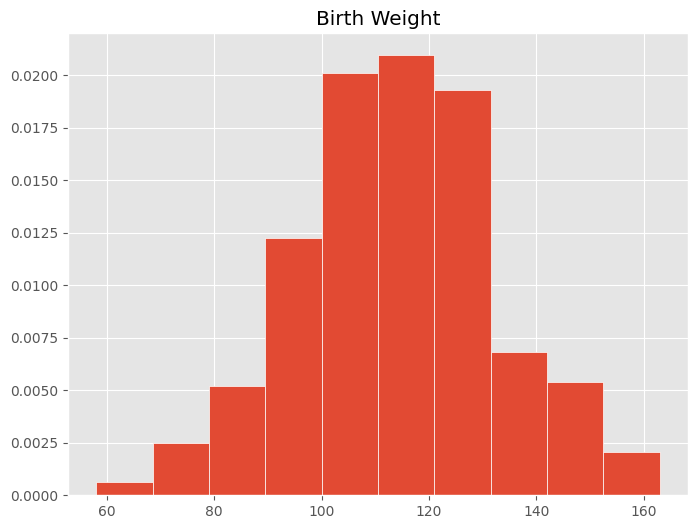

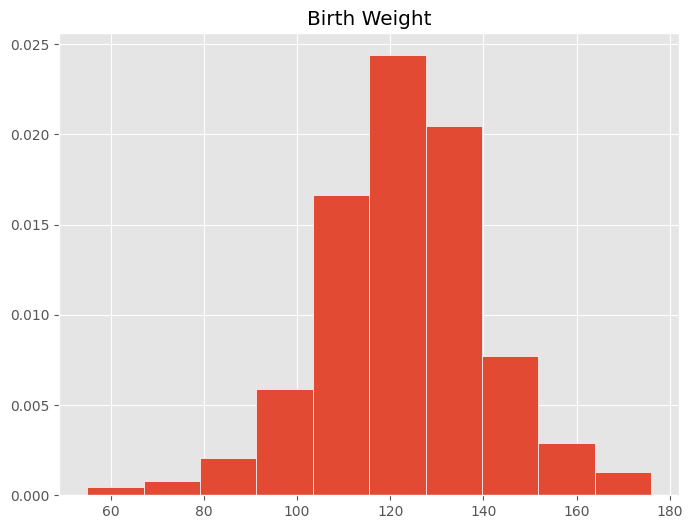

In [177]:
baby_sm = baby.query("`Maternal Smoker`")  # smoking mothers
baby_nsm = baby.query("not `Maternal Smoker`")  # non-smoking mothers

baby_sm.hist("Birth Weight", ec="white", density=True)
baby_nsm.hist("Birth Weight", ec="white", density=True);

The two commands produce two distinct graphs, and we can use them for comparison, but note that the *scales of the axes are different* for the two plots!

But, we can let pandas split the categories and adjust the scales for us:

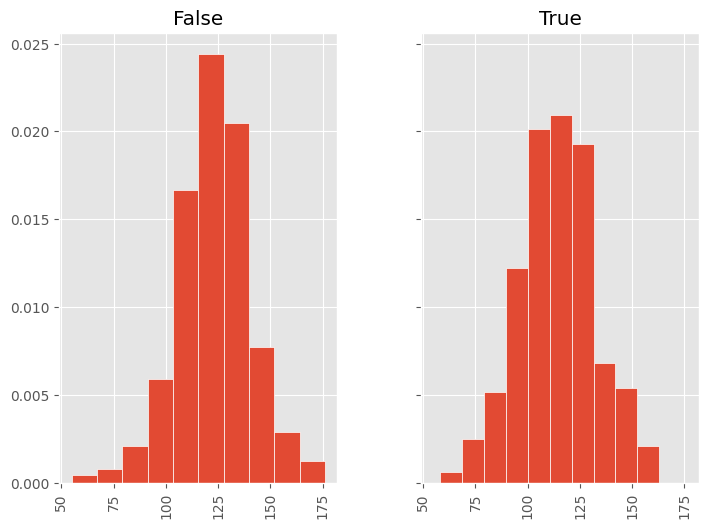

In [178]:
baby.hist(
    "Birth Weight",  # column with values
    by="Maternal Smoker",  # categoroies to split on
    density=True,
    ec="white",
    sharex=True,  # same scale and values for x
    sharey=True,  # same scale and values for y
);

The graphs are also now side by side, helping visualize the differences.

Although not as common, since histograms are visually dense, sometimes we do want to superimpose them for comparison.  So, let's see how we can do it.

Again, we need to use the explicit construction, so that we have a figure/axis to which we can add our histograms:

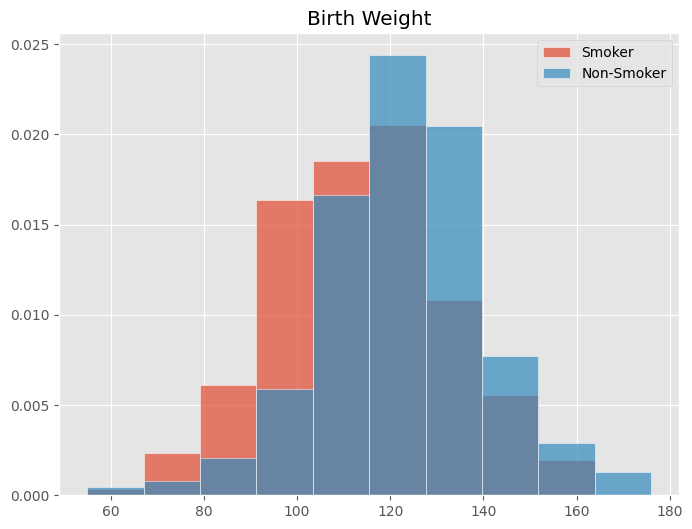

In [179]:
# 10 bins, from minimum to maximum
bins = np.linspace(
    baby["Birth Weight"].min(),
    baby["Birth Weight"].max(),
    11,
)

fig, ax = plt.subplots()  # create figure

# first histogram
(
    baby.query("`Maternal Smoker`")
    .hist("Birth Weight", 
          density=True, 
          ec="white", 
          bins=bins, 
          alpha=0.7,  # some transparency
          label="Smoker",
          ax=ax)  # add to figure
)

# second histogram
(
    baby.query("not `Maternal Smoker`")
    .hist("Birth Weight", 
          density=True, 
          ec="white", 
          bins=bins, 
          alpha=0.7,   # some transparency
          label="Non-Smoker",
           ax=ax)  # add to figure
)

plt.legend();

With these, it is easier to see that the weight of babies of non-smoking mother are shifted to the right, and hence their babies were born heavier than the ones from smoking mothers.

Again, let's write a function to take care of all these steps:

In [180]:
def overlaid_hist(df, column, by, bins=10, alpha=0.7, **kwargs):
    """
    Given a data frame, a column for the histogram, and another
    one (by) to break up the values by, display overlaid histograms
    for each value of the the by-column.
    
    INPUTS:
    df: data frame with the data for the histogram;
    column: label for the column with the numerical data to be used;
    by: label for the column with the categories used to split the histograms;
    bins: number bins (of equal size) or list of bins to be used;
    alpha: float between 0 and 1 giving the opaqueness level;
           - 0.0 is completely transparent (invisible) and 
           - 1.0 is completely opaque;
    **kwargs: keyword arguments (from other matplotlib commands) which are passed to the plotting call;
           
    OUTPUT:
    Overlaid histograms for each category especified by the "by" argument.
    """

    # check if bins is integer
    # if so, define the bins in equal parts
    if isinstance(bins, int):
        numb_bins = bins
        bins = np.linspace(
            df[column].min(),
            df[column].max(),
            numb_bins,
        )

    # values to group by
    values = np.sort(df[by].unique())

    # create figure
    fig, ax = plt.subplots()
    
    # histograms
    for value in values:
        df.loc[df[by] == value].hist(
            column,
            density=True,
            ec="white",
            bins=bins,
            alpha=alpha,
            label=str(value),
            ax=ax,
            **kwargs
        )

    plt.legend()

Testing:

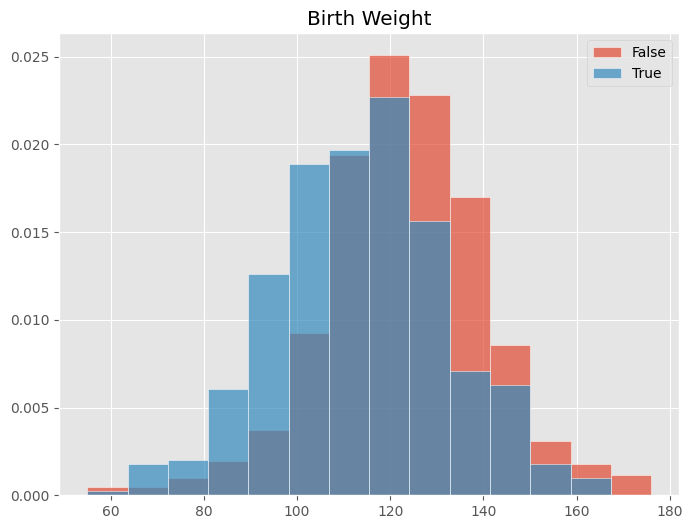

In [181]:
overlaid_hist(baby, "Birth Weight", "Maternal Smoker", bins=15)

To test it for more than two categories, let's add a "studio category" column to our `top_movies_2017` data frame.  The category is randomly selected values between A, B, and C:

In [182]:
studios =  top_movies_2017["Studio"].unique()

studio_category_df = pd.DataFrame(
    {"Studio": studios,
    "Studio Category": np.random.choice(["A", "B", "C"], len(studios))}
)

studio_category_df

,Studio,Studio Category
0,MGM,C
1,Fox,B
2,Universal,C
3,Paramount,A
4,Warner Brothers,A
5,Disney,A
6,Buena Vista,A
7,AVCO,A
8,United Artists,C
9,Columbia,C


Let's then add these studio categories to `top_movies_2017` with `pd.merge`:

In [183]:
top_movies_cat = pd.merge(top_movies_2017, studio_category_df, how="left")

top_movies_cat

,Title,Studio,Gross,Gross (Adjusted),Year,Studio Category
0,Gone with the Wind,MGM,198676459,1796176700,1939,C
1,Star Wars,Fox,460998007,1583483200,1977,B
2,The Sound of Music,Fox,158671368,1266072700,1965,B
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,C
4,Titanic,Paramount,658672302,1204368000,1997,A
...,...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980,B
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016,A
197,The Firm,Paramount,158348367,340028200,1993,A
198,Suicide Squad,Warner Brothers,325100054,339411900,2016,A


Now, let's draw the overlaid histograms for the three studio categories:

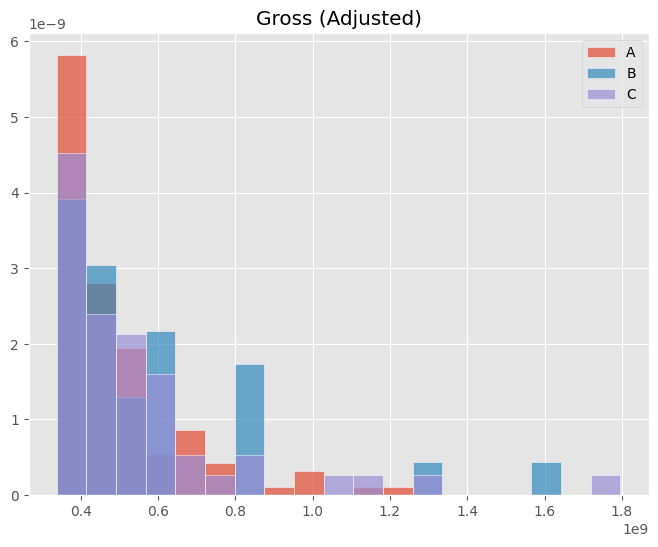

In [184]:
overlaid_hist(top_movies_cat, "Gross (Adjusted)", "Studio Category", bins=20)

## Tweaks

We've already illustrated many of the tweaks that we can apply to plots from matplotlib and pandas.  Here we just collect them in a table, which can be used as a reference, and add a couple more:

| **Command** | **Result** |
|-------------|------------|
| `plt.title` | Add title to the plot |
| `plt.xlabel` | Label for $x$-axis |
| `plt.ylabel` | Label for $y$-axis |
| `plt.legend` | Produces a legend when overlaying graphs |
| `plt.xlim` | Sets the range of values for the $x$-axis |
| `plt.ylim` | Sets the range of values for the $y$-axis |


## Comments, Suggestions, Corrections

Please send your comments, suggestions, and corrections to lfinotti@utk.edu.